# Fifth order Dixon functions as Kronecker theta functions derived from the Frobenius-Stickelberger determinant

This notebook explores fith order Dixon functions. Their name references Dixon functions because the well known Dixon functions are second order fully degenerate Kronecker theta functions, where degeneracy means taking the limit where all modes become the same in the Frobenius-Stickelberger determinant formula for Weierstrass sigma functions. Their name references fith order because in this example they are dervied from the Frobenius-Stickelberger determinant formula involving a product of five modes. This is a very interesting case because it is the first order at which two different Hamiltonian systems can be built from the same functional identity (conservation law). If the Hamiltonian is expressed as a polynomial in the mode and its conjugate, as is typically done at lower orders, then, unlike at lower orders, at this order that will build a dynamic system solved by hyperelliptic functions of genus 2. However, it is still possible to build a Hamiltonian that is solved by elliptic functions of genus 1 (fully degenerate Kronecker theta functions) but the Hamiltonian is no longer a polynomial in the modes but rather a rational function of them.

In [1]:
from sympy import *
(x, y, X, Y, Z, B, C, n, m, l, j, N, M, K, k, z, s, p1, p2, p3, g2, g3, rho,
 z0, w1, w2, w3, e1, e2, e3, Delta, 
 omega1, omega2, omega3, eta1, eta2, eta3, d1, d2, d3, t, t0) = symbols(
    '''x, y, X, Y, Z, B, C, n, m, l, j, N, M, K, k, z, s, p1, p2, p3, g2, g3, rho,
    z0, w1, w2, w3, e1, e2, e3, Delta, 
    omega1, omega2, omega3, eta1, eta2, eta3, d1, d2, d3, t, t0'''
)
alpha, delta, nu, theta, Delta = symbols('alpha, delta, nu, theta, Delta')
q = Function('q')
pw = Function('pw') # Weierstrass P function
pwp = Function('pwp') # Derivative of Weierstrass P function
zw = Function('zw') # Weierstrass Zeta function
sigma = Function('sigma') # Weierstrass Sigma function
rho = Function('rho')
f = Function('f')
h = Function('h')
s = Function('s')
u = Function('u')
v = Function('v')
r = Function('r')
chi = Function('chi')
P = Function('P') # Polynomial
Q = Function('Q') # Polynomial
R = Function('R') # Polynomial
T = Function('T') # Polynomial
phi = Function('phi')
Phi = Function('Phi')
A = IndexedBase('A')
Det = Function("Det")

t0 = Symbol('t0')

kappa = IndexedBase('kappa')
beta = IndexedBase('beta')
mu = IndexedBase('mu')
xi = IndexedBase('xi')
a = IndexedBase('a')
b = IndexedBase('b')
c = IndexedBase('c')
d = IndexedBase('d')
p = IndexedBase('p')
G = IndexedBase('G')
psi = IndexedBase('psi')
upsilon = IndexedBase('upsilon')
epsilon = IndexedBase('epsilon')
WPdet = Function('WPdet')
U = Function('U')
V = Function('V')
W = Function('W')
F = Function('F')

wild = Wild('*')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# kth order derivatives of Weierstrass P
from wpk import wpk, wzk, wsk, run_tests

# The package containing mpmath expressions for Weierstrass elliptic functions
from numerical_evaluation.weierstrass_modified import Weierstrass
we = Weierstrass()
from mpmath import exp as mpexp

# Nuemric solutions to diff eqs
from numpy import linspace, absolute, angle, square, real, imag, conj, array as arraynp, concatenate
from numpy import vectorize as np_vectorize # not to get confused with vectorise in other packages
import scipy.integrate
import matplotlib.pyplot as plt
from random import random

%load_ext autoreload
%autoreload 2

In [2]:
run_tests()

True
True
True
True
True
True
True
True
True


## Weierstrass elliptic function identities

In [3]:
pwp_sqrd = Eq(pwp(z,g2,g3)**2, 4*pw(z,g2,g3)**3 - g2*pw(z,g2,g3) - g3)

pw_xy_addition = Eq(pw(x+y,g2,g3), 
   ((pwp(x, g2, g3) - pwp(y, g2, g3))**2/(pw(x, g2, g3) - pw(y, g2, g3))**2)/4 - pw(x, g2, g3) - pw(y, g2, g3)
)
p_duplication_a = Eq(pw(2*z,g2,g3), -2*pw(z,g2,g3) + ((diff(pw(z,g2,g3),z,2)/diff(pw(z,g2,g3),z,1))**2)/4)
p_duplication_b = Eq(pw(2*z, g2, g3), (-g2/2 + 6*pw(z, g2, g3)**2)**2/(4*pwp(z, g2, g3)**2) - 2*pw(z, g2, g3))
p_duplication_c = p_duplication_b.subs(pwp(z,g2,g3)**2, 4*pw(z,g2,g3)**3 - g2*pw(z,g2,g3) - g3)

sigma_p_identity = Eq(
    pw(y, g2, g3) - pw(x, g2, g3),
    sigma(x + y, g2, g3) * sigma(x - y, g2, g3) / (sigma(x, g2, g3) ** 2 * sigma(y, g2, g3) ** 2) 
)

pw_to_zw_identity = Eq(
    (pwp(x,g2,g3) - pwp(y,g2,g3))/(pw(x,g2,g3) - pw(y,g2,g3))/2,
    zw(x + y,g2, g3) - zw(x,g2, g3) - zw(y,g2, g3)
)

# 23.10.9 https://dlmf.nist.gov/23.10#E9
zw2z_2zwz = Eq(zw(2*z,g2,g3), 2*zw(z,g2,g3) + diff(zw(z,g2,g3),z,3)/diff(zw(z,g2,g3),z,2)/2)
dzw_2 = Eq(diff(zw(z,g2,g3),z,2), -pwp(z,g2,g3))
dzw_3 = Eq(diff(zw(z,g2,g3),z,3), -diff(pwp(z,g2,g3),z))
pwp_def = Eq(pwp(z,g2,g3)**2, 4*pw(z,g2,g3)**3 - g2*pw(z,g2,g3) - g3)
pwp2_def = Eq(diff(pwp_def.lhs,z)/pwp(z,g2,g3)/2, 
              diff(pwp_def.rhs,z).subs(diff(pw(z,g2,g3),z),pwp(z,g2,g3))/pwp(z,g2,g3)/2).expand()
zw2z_2zwz_pw_pwp = zw2z_2zwz.subs([dzw_3.args, dzw_2.args]).subs(*pwp2_def.args)

pwp_sigma_dbl_ratio = Eq(pwp(z,g2,g3), - sigma(2*z,g2,g3)/sigma(z,g2,g3)**4)
d_zw_pw = Eq(diff(zw(z,g2,g3),z), -pw(z,g2,g3))
d_log_sigma_zw = Eq(Derivative(ln(sigma(z,g2,g3)),z), zw(z,g2,g3))
d_sigma_zw = Eq(diff(sigma(z,g2,g3),z), solve(d_log_sigma_zw.doit(), diff(sigma(z,g2,g3),z))[0])
d_sigma_zw_2 = Eq(diff(d_sigma_zw.lhs,z), diff(d_sigma_zw.rhs,z).subs([d_sigma_zw.args, d_zw_pw.args]))
pw_diff_at_zero = Eq(Limit(Derivative(pw(z, g2, g3), (z, j)), z, 0, dir='+'),
 (-1)**j*z**(-j - 2)*factorial(j + 1) - 
                     (-1)**j*((-1)**j/2 + Rational(1,2))*RisingFactorial(-j - 1, j + 1)*G[j + 2])


expansion_z_wp = Eq(pw(z,g2,g3), 1/z**2 + Sum((2*n+1)*G[2*n+2]*z**(2*n),(n,1,oo)))
one_over_sigma_z_big_o = Eq(1/sigma(z,g2,g3), (1/z*(1 - (- g2*z**4/10 - 6*g3/7*z**6 + O(z**8)))).expand())
sigma_expansion_g_2_3 = Eq(sigma(z, g2, g3),
    85860*g2**2*g3**2*z**21/7 + 171*g2**2*g3*z**15/10 - g2**2*z**9/4 + 
    9936*g2*g3**2*z**17/17 - 18*g2*g3*z**11/11 - g2*z**5/10 - 
    216*g3**2*z**13/13 - 6*g3*z**7/7 + z
)

quasi_period = Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3),
 (-1)**(m*n + m + n)*sigma(z, g2, g3)*
                  exp(2*eta1*m*n*omega3 + 2*eta1*n**2*omega1 + 2*eta1*n*z + 
                      2*eta3*m**2*omega3 + 2*eta3*m*n*omega1 + 2*eta3*m*z)
                 )



taylor_series = Eq(f(x), Sum(Derivative(f(x),(x,n)).subs(x,a)/factorial(n) * (x - a)**n, (n,0,N)))
taylor_series_b = taylor_series.subs(x,x+a)




pwp_sqrd
pw_xy_addition
p_duplication_a
p_duplication_b
p_duplication_c
sigma_p_identity
pw_to_zw_identity
zw2z_2zwz_pw_pwp
pwp_sigma_dbl_ratio
d_zw_pw
d_log_sigma_zw
d_sigma_zw
d_sigma_zw_2

pw_diff_at_zero
expansion_z_wp
one_over_sigma_z_big_o
sigma_expansion_g_2_3
quasi_period
taylor_series_b

Eq(pwp(z, g2, g3)**2, -g2*pw(z, g2, g3) - g3 + 4*pw(z, g2, g3)**3)

Eq(pw(x + y, g2, g3), -pw(x, g2, g3) - pw(y, g2, g3) + (pwp(x, g2, g3) - pwp(y, g2, g3))**2/(4*(pw(x, g2, g3) - pw(y, g2, g3))**2))

Eq(pw(2*z, g2, g3), -2*pw(z, g2, g3) + Derivative(pw(z, g2, g3), (z, 2))**2/(4*Derivative(pw(z, g2, g3), z)**2))

Eq(pw(2*z, g2, g3), (-g2/2 + 6*pw(z, g2, g3)**2)**2/(4*pwp(z, g2, g3)**2) - 2*pw(z, g2, g3))

Eq(pw(2*z, g2, g3), (-g2/2 + 6*pw(z, g2, g3)**2)**2/(4*(-g2*pw(z, g2, g3) - g3 + 4*pw(z, g2, g3)**3)) - 2*pw(z, g2, g3))

Eq(-pw(x, g2, g3) + pw(y, g2, g3), sigma(x - y, g2, g3)*sigma(x + y, g2, g3)/(sigma(x, g2, g3)**2*sigma(y, g2, g3)**2))

Eq((pwp(x, g2, g3) - pwp(y, g2, g3))/(2*(pw(x, g2, g3) - pw(y, g2, g3))), -zw(x, g2, g3) - zw(y, g2, g3) + zw(x + y, g2, g3))

Eq(zw(2*z, g2, g3), (-g2/2 + 6*pw(z, g2, g3)**2)/(2*pwp(z, g2, g3)) + 2*zw(z, g2, g3))

Eq(pwp(z, g2, g3), -sigma(2*z, g2, g3)/sigma(z, g2, g3)**4)

Eq(Derivative(zw(z, g2, g3), z), -pw(z, g2, g3))

Eq(Derivative(log(sigma(z, g2, g3)), z), zw(z, g2, g3))

Eq(Derivative(sigma(z, g2, g3), z), sigma(z, g2, g3)*zw(z, g2, g3))

Eq(Derivative(sigma(z, g2, g3), (z, 2)), -pw(z, g2, g3)*sigma(z, g2, g3) + sigma(z, g2, g3)*zw(z, g2, g3)**2)

Eq(Limit(Derivative(pw(z, g2, g3), (z, j)), z, 0, dir='+'), (-1)**j*z**(-j - 2)*factorial(j + 1) - (-1)**j*((-1)**j/2 + 1/2)*RisingFactorial(-j - 1, j + 1)*G[j + 2])

Eq(pw(z, g2, g3), Sum(z**(2*n)*(2*n + 1)*G[2*n + 2], (n, 1, oo)) + z**(-2))

Eq(1/sigma(z, g2, g3), 1/z + 6*g3*z**5/7 + g2*z**3/10 + O(z**7))

Eq(sigma(z, g2, g3), 85860*g2**2*g3**2*z**21/7 + 171*g2**2*g3*z**15/10 - g2**2*z**9/4 + 9936*g2*g3**2*z**17/17 - 18*g2*g3*z**11/11 - g2*z**5/10 - 216*g3**2*z**13/13 - 6*g3*z**7/7 + z)

Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3), (-1)**(m*n + m + n)*sigma(z, g2, g3)*exp(2*eta1*m*n*omega3 + 2*eta1*n**2*omega1 + 2*eta1*n*z + 2*eta3*m**2*omega3 + 2*eta3*m*n*omega1 + 2*eta3*m*z))

Eq(f(x + a), Sum(x**n*Subs(Derivative(f(x), (x, n)), x, a)/factorial(n), (n, 0, N)))

In [4]:
def sigma_taylor_series(_N: int, _x):
    """
    Derives the Nth order Taylor series expansion of the Weiertrass sigma function about point x
    """
    if not a:
        print('The point x cannot be zero yet...')
        raise
    # Taylor series definition
    sigma_taylor = Eq(sigma(z + _x,g2,g3), 
                      Sum(z**n*Subs(diff(sigma(z,g2,g3), (z, n)), z, _x)/factorial(n), (n, 0, _N)).doit())
    # Substitute diffs of Weierstrass sigma for Weierstrass P, P Prime, and zeta
    for _n in range(1, _N + 1):
        sigma_taylor = sigma_taylor.replace(diff(sigma(wild,g2,g3),(wild,_n)), wsk(_n).rhs.subs(z, _x)).doit()
    # Collect and simplify
    return Eq(sigma_taylor.lhs, sigma_taylor.rhs.expand().collect(z,factor))

In [5]:
sigma_taylor_series(3, x)

Eq(sigma(x + z, g2, g3), -z**3*(3*pw(x, g2, g3)*zw(x, g2, g3) + pwp(x, g2, g3) - zw(x, g2, g3)**3)*sigma(x, g2, g3)/6 - z**2*(pw(x, g2, g3) - zw(x, g2, g3)**2)*sigma(x, g2, g3)/2 + z*sigma(x, g2, g3)*zw(x, g2, g3) + sigma(x, g2, g3))

In [6]:
log_sigma_xy_a = Eq(Derivative(log(sigma(x+y,g2,g3)/sigma(y,g2,g3)),y), zw(x+y,g2,g3) - zw(y,g2,g3))
log_sigma_xy_b = Eq(Derivative(log(sigma(x+y,g2,g3)/sigma(y,g2,g3)*exp(-zw(x,g2,g3)*y)),y), 
   -zw(x, g2, g3) + zw(x+y,g2,g3) - zw(y,g2,g3))

pwp_x_y_log_sigma_diff = Eq(pwp(x, g2, g3)/((pw(x, g2, g3) - pw(y, g2, g3))),
 2*Derivative(log(sigma(x+y,g2,g3)/sigma(y,g2,g3)*exp(-zw(x,g2,g3)*y)),y) 
   - Derivative(log(pw(x,g2,g3) - pw(y,g2,g3)),y)
  )

pwp_x_y_log_sigma_diff_b = Eq(pwp_x_y_log_sigma_diff.lhs,
 2*Derivative(log(sigma(x + y, g2, g3)*exp(-y*zw(x, g2, g3))/sigma(y, g2, g3)/sigma(x, g2, g3)), y) - 
   Derivative(log(sigma(x + y, g2, g3)*exp(-y*zw(x, g2, g3))/
                  (sigma(x, g2, g3)*sigma(y, g2, g3))), y)-
   Derivative(log(sigma(-x + y, g2, g3)*exp(y*zw(x, g2, g3))/
                  (sigma(x, g2, g3)*sigma(y, g2, g3))), y)
  
)
pwp_x_y_log_sigma_diff_c = Eq(pwp(x, g2, g3)/(pw(x, g2, g3) - pw(y, g2, g3)),
    Derivative(log(sigma(x + y, g2, g3)*exp(-2*y*zw(x, g2, g3))/sigma(-x + y, g2, g3)), y)
)

pw_to_zw_identity
log_sigma_xy_a
log_sigma_xy_b
pwp_x_y_log_sigma_diff
pwp_x_y_log_sigma_diff_b
pwp_x_y_log_sigma_diff_c

Eq((pwp(x, g2, g3) - pwp(y, g2, g3))/(2*(pw(x, g2, g3) - pw(y, g2, g3))), -zw(x, g2, g3) - zw(y, g2, g3) + zw(x + y, g2, g3))

Eq(Derivative(log(sigma(x + y, g2, g3)/sigma(y, g2, g3)), y), -zw(y, g2, g3) + zw(x + y, g2, g3))

Eq(Derivative(log(sigma(x + y, g2, g3)*exp(-y*zw(x, g2, g3))/sigma(y, g2, g3)), y), -zw(x, g2, g3) - zw(y, g2, g3) + zw(x + y, g2, g3))

Eq(pwp(x, g2, g3)/(pw(x, g2, g3) - pw(y, g2, g3)), 2*Derivative(log(sigma(x + y, g2, g3)*exp(-y*zw(x, g2, g3))/sigma(y, g2, g3)), y) - Derivative(log(pw(x, g2, g3) - pw(y, g2, g3)), y))

Eq(pwp(x, g2, g3)/(pw(x, g2, g3) - pw(y, g2, g3)), -Derivative(log(sigma(-x + y, g2, g3)*exp(y*zw(x, g2, g3))/(sigma(x, g2, g3)*sigma(y, g2, g3))), y) + Derivative(log(sigma(x + y, g2, g3)*exp(-y*zw(x, g2, g3))/(sigma(x, g2, g3)*sigma(y, g2, g3))), y))

Eq(pwp(x, g2, g3)/(pw(x, g2, g3) - pw(y, g2, g3)), Derivative(log(sigma(x + y, g2, g3)*exp(-2*y*zw(x, g2, g3))/sigma(-x + y, g2, g3)), y))

## Frobenius Stickelberger determinant formula for Kronecker theta functions

In [7]:
sigma_product_f_s = (
    (-1)**(N*(N-1)/2)*
    Product(factorial(k),(k,1,N))*
    sigma(Sum(mu[j],(j,0,N)),g2,g3)*
    Product(Product(Piecewise((sigma(mu[l] - mu[m], g2, g3),l<m),(1,True)),(l,0,N)),(m,0,N))/
    Product(sigma(mu[n],g2,g3)**(N+1),(n,0,N))
)

def frob_stick(Nval, evaluated=False, WPversion=False):
    """
    Frobenius Stickelberger in its original form
    """
    if evaluated:
        return Eq(p_matrix_f_s(Nval).det(), sigma_product_f_s.subs(N,Nval).doit())
    elif WPversion:
        return Eq(WPdet(Nval), sigma_product_f_s.subs(N,Nval).doit())
    return Eq(Det(p_matrix_f_s(Nval)), sigma_product_f_s.subs(N,Nval).doit())

In [8]:
sigma_product_f_s_N_factored = (
    (-1)**(N*(N-1)/2)*
    Product(factorial(k),(k,1,N-1))*
    factorial(N)*
    sigma(Sum(mu[j],(j,0,N)),g2,g3)*
    Product(Product(Piecewise((sigma(mu[l] - mu[m], g2, g3),l<m),(1,True)),(l,0,N-1)),(m,0,N-1))*
    Product(Piecewise((sigma(mu[l] - mu[N], g2, g3),l<N),(1,True)),(l,0,N))/
    Product(sigma(mu[n],g2,g3)**(N),(n,0,N))/
    Product(sigma(mu[n],g2,g3),(n,0,N))
)

sigma_product_f_s_N_over_N_minus_1 = (sigma_product_f_s_N_factored/sigma_product_f_s.subs(N,N-1))

subs1_list = [
    (Product(Piecewise((sigma(mu[l] - mu[N], g2, g3),l<N),(1,True)),(l,0,N)), 
     (-1)**N*Product(sigma(z - xi[l], g2, g3),(l,0,N))/sigma(z - xi[N], g2, g3)),
    (Product(sigma(mu[n],g2,g3),(n,0,N)),Product(sigma(xi[n],g2,g3),(n,0,N))*sigma(z,g2,g3)/sigma(xi[N],g2,g3)),
    (sigma(Sum(mu[j],(j,0,N-1)),g2,g3),-sigma(xi[N],g2,g3)),
    (Sum(mu[j],(j,0,N)),-xi[N]+z),
    (sigma(mu[N],g2,g3),sigma(z,g2,g3))
]
subs2_list = [
    ((-1)**(2*N)*Product(sigma(z - xi[l], g2, g3),(l,0,N)), 
   Product(sigma(z - xi[l], g2, g3)/sigma(xi[l], g2, g3)/sigma(z, g2, g3),(l,0,N)) *
   Product(sigma(xi[n], g2, g3),(n,0,N)) *
   (Product(sigma(z, g2, g3),(l,0,N)).doit()))
]

wp_sigma_product_fs_N_over_N_minus_1_mu_n = Eq(WPdet(N)/WPdet(N-1), sigma_product_f_s_N_over_N_minus_1).subs(
    Product(sigma(mu[n],g2,g3)**N,(n,0,N)),sigma(mu[N],g2,g3)**N*Product(sigma(mu[n],g2,g3)**N,(n,0,N-1))
).expand()

wp_sigma_product_fs_N_over_N_minus_1 = (
    wp_sigma_product_fs_N_over_N_minus_1_mu_n
    .subs(subs1_list)
    .subs(subs2_list)
).expand()
sigma_product_f_s_N_over_N_minus_1 = wp_sigma_product_fs_N_over_N_minus_1.rhs


def p_matrix_f_s(N): 
    return Matrix([[1, *[pw(x,g2,g3).diff((x,j)).subs(x,mu[k]) for j in range(N)]] for k in range(N+1)])

def p_matrix_f_s_1dz(N): 
    return Matrix([*[[1, *[pw(x,g2,g3).diff((x,j)).subs(x,mu[k]) for j in range(N)]] for k in range(N)],
       [1, *[pw(z,g2,g3).diff((z,j)) for j in range(N)]]])

def frob_stick_1dz_ratio(Nval, evaluated=False):
    """
    Frobenius Stickelberger adapted for Kronecker theta functions
    """
    if evaluated:
        return Eq(
            (((-1)**(Nval-1)/factorial(Nval) * p_matrix_f_s_1dz(Nval).det()/p_matrix_f_s(Nval-1).det()).expand())
                  .collect([pw(z,g2,g3), diff(pw(z,g2,g3),z)],factor), 
            (-1)**(Nval-1)/factorial(Nval) * sigma_product_f_s_N_over_N_minus_1.subs(N,Nval).doit().subs(
            xi[Nval],-Sum(xi[j],(j,0,Nval-1)).doit()
        ).subs([(xi[j],mu[j]) for j in range(Nval)]))
    
    return Eq(
        (-1)**(Nval-1)/factorial(Nval) * Det(p_matrix_f_s_1dz(Nval))/Det(p_matrix_f_s(Nval-1)), 
        
        (-1)**(Nval-1)/factorial(Nval) * sigma_product_f_s_N_over_N_minus_1.subs(N,Nval).doit().subs(
            xi[Nval],-Sum(xi[j],(j,0,Nval-1)).doit()
        ).subs([(xi[j],mu[j]) for j in range(Nval)]))

## General completely degenerate case

In [9]:
def diff_mu_0_deg(Nval):
    return Matrix([
        [1 if j == 0 else 0, *[diff(pw(mu[0], g2, g3), (mu[0], i + j)) for i in range(Nval - 1)]]
        for j in range(Nval)
    ])

def diff_mu_0_z_deg(Nval):
    return Matrix([
        *[
            [1 if j == 0 else 0, *[diff(pw(mu[0], g2, g3), (mu[0], i + j)) for i in range(Nval)]]
            for j in range(Nval)
        ],
        [1, *[diff(pw(z, g2, g3), (z, i)) for i in range(Nval)]]
   ])

def det_ratio_deg_case(Nval, evaluated=False):
    if evaluated:
        return Eq(1/factorial(Nval) * det(diff_mu_0_z_deg(Nval))/det(diff_mu_0_deg(Nval)), 
                  -sigma(z - mu[0], g2, g3)**Nval*sigma(z + Nval*mu[0], g2, g3)
                  /sigma(Nval*mu[0], g2, g3)/sigma(mu[0], g2, g3)**Nval/sigma(z, g2, g3)**(Nval +1))
    return Eq(1/factorial(Nval) * Det(diff_mu_0_z_deg(Nval))/Det(diff_mu_0_deg(Nval)),
              -sigma(z - mu[0], g2, g3)**Nval*sigma(z + Nval*mu[0], g2, g3)
                  /sigma(Nval*mu[0], g2, g3)/sigma(mu[0], g2, g3)**Nval/sigma(z, g2, g3)**(Nval+1))
    

In [10]:
sigma_product_f_sb = (
    (-1)**(N*(N-1)/2)*
    Product(factorial(k),(k,1,N))*
    sigma(Sum(mu[0] + epsilon[j],(j,0,N)),g2,g3)*
    Product(Product(Piecewise((sigma(mu[0] + epsilon[l] - mu[0] - epsilon[m], g2, g3),l<m),(1,True)),(l,0,N)),(m,0,N))/
    Product(sigma(mu[0] + epsilon[n],g2,g3)**(N+1),(n,0,N))
)
sigma_product_f_sc = (
    (-1)**(N*(N-1)/2)*
    Product(factorial(k),(k,1,N))*
    sigma(Sum(mu[0],(j,0,N)).doit(),g2,g3)*
    Product(Product(Piecewise((sigma(mu[0] + epsilon[l] - mu[0] - epsilon[m], g2, g3),l<m),(1,True)),(l,0,N)),(m,0,N))/
    Product(sigma(mu[0],g2,g3)**(N+1),(n,0,N)).doit()
)

sigma_product_f_sd = (
    (-1)**(N*(N-1)/2)*
    Product(factorial(k),(k,1,N))**2 *
    sigma((N+1)*mu[0],g2,g3)*
    Product(Product(Piecewise((sigma(epsilon[l] - epsilon[m], g2, g3),l<m),(1,True)),(l,0,N)),(m,0,N))/
    sigma(mu[0],g2,g3)**(N+1)**2/Product(epsilon[j]**j, (j,1,N))
)

sigma_product_f_se = (
    (-1)**(N**2)*Product(factorial(k),(k,1,N))**2 * sigma((N+1)*mu[0],g2,g3)/sigma(mu[0],g2,g3)**(N+1)**2
)

In [11]:
def det_const_deg_case(Nval, evaluated=False):
    if evaluated:
        return Eq(det(diff_mu_0_deg(Nval)), 
            (-1)**((Nval-1)**2)*product(factorial(k),(k,1,Nval - 1))**2 * 
            sigma(Nval*mu[0],g2,g3)/sigma(mu[0],g2,g3)**((Nval)**2)
                 )
    return Eq(Det(diff_mu_0_deg(Nval)),
        (-1)**((Nval-1)**2)*product(factorial(k),(k,1,Nval - 1))**2 * 
            sigma(Nval*mu[0],g2,g3)/sigma(mu[0],g2,g3)**((Nval)**2)
             )

In [12]:
def det_ratio_deg_case(Nval, evaluated=False):
    if evaluated:
        return Eq(1/factorial(Nval) * det(diff_mu_0_z_deg(Nval))/det(diff_mu_0_deg(Nval)), 
                  -sigma(z - mu[0], g2, g3)**Nval*sigma(z + Nval*mu[0], g2, g3)
                  /sigma(Nval*mu[0], g2, g3)/sigma(mu[0], g2, g3)**Nval/sigma(z, g2, g3)**(Nval +1))
    return Eq(1/factorial(Nval) * Det(diff_mu_0_z_deg(Nval))/Det(diff_mu_0_deg(Nval)),
              -sigma(z - mu[0], g2, g3)**Nval*sigma(z + Nval*mu[0], g2, g3)
                  /sigma(Nval*mu[0], g2, g3)/sigma(mu[0], g2, g3)**Nval/sigma(z, g2, g3)**(Nval+1))

## Numerical test

In [13]:
def mpc_to_float(mpc_val):
    return float(mpc_val.real) + float(mpc_val.imag)*1j

def sigma_prod_const(_z, _N, omegas):
    return (    
        (-1)**((_N - 1)**2)*product(factorial(k),(k,1,_N - 1))**2 * 
        we.wsigma(_N *_z, omegas)/we.wsigma(_z, omegas)**(_N**2)
    ).expand().evalf()

def test_const_det_sigma_power(_z, _g2, _g3, _N):
    omega_ = we.omega_from_g(_g2, _g3)
    omega1_ = mpc_to_float(omega_[0])
    omega2_ = mpc_to_float(omega_[1])
    omega3_ = mpc_to_float(omega_[2])
    if im(omega2_/omega1_) <= 0:
        omega2_ = -omega2_
    omegas_ = (omega1_, omega2_)  

    pw_val = mpc_to_float(we.wp(_z, omegas_))
    pwp_val = mpc_to_float(we.wpprime(_z, omegas_))

    sigma_N_val = sigma_prod_const(_z, _N, omegas_)

    det_N_val_ = (
        det_const_deg_case(Nval=_N, evaluated=False).lhs.args[0]
        .subs([wpk(_i).subs(z,mu[0]).args for _i in range(1, 2*_N - 1)][::-1])
        .subs([(pw(mu[0],g2,g3),pw_val), (pwp(mu[0],g2,g3),pwp_val), (g2, _g2), (g3, _g3)])
        .expand()
        .det()
    )

    err_val = abs(sigma_N_val - det_N_val_)/(sigma_N_val + det_N_val_)
    
    return {
        "sigma_N_val": sigma_N_val,
        "det_N_val_": det_N_val_,
        "err_val": err_val
    }


def sigma_prod(_z, _mu0, _N, omegas): 
    return (    
        -we.wsigma(_z - _mu0, omegas)**_N*we.wsigma(_z + _N*_mu0, omegas)/
        we.wsigma(_N*_mu0, omegas)/
        we.wsigma(_mu0, omegas)**_N/
        we.wsigma(_z, omegas)**(_N+1)
    )

def test_det_ratio(_z, _mu0, _g2, _g3, _N):
    omega_ = we.omega_from_g(_g2, _g3)
    omega1_ = mpc_to_float(omega_[0])
    omega2_ = mpc_to_float(omega_[1])
    omega3_ = mpc_to_float(omega_[2])
    if im(omega2_/omega1_) <= 0:
        omega2_ = -omega2_
    omegas_ = (omega1_, omega2_)  

    pw_val_mu0 = mpc_to_float(we.wp(_mu0, omegas_))
    pwp_val_mu0 = mpc_to_float(we.wpprime(_mu0, omegas_))
    pw_val_z = mpc_to_float(we.wp(_z, omegas_))
    pwp_val_z = mpc_to_float(we.wpprime(_z, omegas_))

    sigma_N_val = sigma_prod(_z, _mu0, _N, omegas_)

    det_ratio_N_val_ = ( 
        diff_mu_0_z_deg(_N)
        .subs([wpk(_i).subs(z,mu[0]).args for _i in range(1, 2*_N - 1)][::-1])
        .subs([wpk(_i).args for _i in range(1, 2*_N - 1)][::-1])
        .subs([(pw(mu[0],g2,g3), pw_val_mu0), (pwp(mu[0],g2,g3),pwp_val_mu0)])
        .subs([(pw(z,g2,g3), pw_val_z), (pwp(z,g2,g3), pwp_val_z), (g2, _g2), (g3, _g3)])
        .expand()
        .det() /
        diff_mu_0_deg(_N)
        .subs([wpk(_i).subs(z,mu[0]).args for _i in range(1, 2*_N - 1)][::-1])
        .subs([wpk(_i).args for _i in range(1, 2*_N - 1)][::-1])
        .subs([(pw(mu[0],g2,g3), pw_val_mu0), (pwp(mu[0],g2,g3),pwp_val_mu0)])
        .subs([(pw(z,g2,g3), pw_val_z), (pwp(z,g2,g3), pwp_val_z), (g2, _g2), (g3, _g3)])
        .expand()
        .det() /
        factorial(_N)
   ).expand().evalf()

    err_val = abs(sigma_N_val - det_ratio_N_val_)/(sigma_N_val + det_ratio_N_val_)
    
    return {
        "sigma_N_val": sigma_N_val,
        "det_ratio_N_val_": det_ratio_N_val_,
        "err_val": err_val
    }

def num_evaluate_weierstrass(expression, values, show_expression=True):

    lhs_value = (expression.lhs
        .subs(values)
        .replace(sigma, we.wsigma_from_g2_g3)
        .replace(zw, we.wzeta_from_g2_g3)
        .replace(pw, we.wp_from_g2_g3)
        .replace(pwp, we.wpprime_from_g2_g3)
    )

    rhs_value = (expression.rhs
        .subs(values)
        .replace(sigma, we.wsigma_from_g2_g3)
        .replace(zw, we.wzeta_from_g2_g3)
        .replace(pw, we.wp_from_g2_g3)
        .replace(pwp, we.wpprime_from_g2_g3)
    )
    
    try:
        lhs_value = lhs_value.evalf()
    except:
        pass
    try:
        rhs_value = rhs_value.evalf()
    except:
        pass
        
    print('LHS', lhs_value)
    print('RHS', rhs_value)
    # Symmetric Mean Absolute Percentage Error (SMAPE)
    print('ERROR (SMAPE)', abs(lhs_value - rhs_value) * 2/(abs(lhs_value) + abs(rhs_value)))
    
    if show_expression:
        return expression

In [14]:
from random import random
g2val_ = (random() - 0.5) + (random() - 0.5)*1j
g3val_ = (random() - 0.5) + (random() - 0.5)*1j
zval_ = (random() - 0.5) + (random() - 0.5)*1j

omega_ = we.omega_from_g(g2val_, g3val_)
omega1_ = mpc_to_float(omega_[0])
omega2_ = mpc_to_float(omega_[1])
omega3_ = mpc_to_float(omega_[2])
if im(omega2_/omega1_) <= 0:
    omega2_ = -omega2_
omegas = (omega1_, omega2_)  

num_subs_simple = [
    (eta1, zw(omega1, g2, g3)), (g2, g2val_), (g3, g3val_), (omega1, omega1_), (z,zval_)
]

## The fith order case

The starting point is the Frobenius-Stickelberger determinant formula involving a product of five Kronecker theta functions in the limit that all the free $\mu_j$ parameters in the determinant tend to the same value (degeneracy).

In [15]:
N_order = 5

In [16]:
vals = [mu[_k] for _k in range(N_order)]
vals.append(z)
wpk_subs = [wpk(_n).subs(z, val) for val in vals for _n in range(1,N_order + 2)][::-1]

In [17]:
drdc_3 = det_ratio_deg_case(N_order - 1)
drdc_3_with_subs = drdc_3.subs([_eq.args for _eq in wpk_subs])

__xx = (drdc_3
        .subs(*det_const_deg_case(Nval=N_order - 1, evaluated=False).args)
        .subs([_eq.args for _eq in wpk_subs])
       )

drdc_3
drdc_3_with_subs
__xx

# det_ratio_deg_case(3).subs(*det_const_deg_case(Nval=3, evaluated=False).args)

Eq(Det(Matrix([
[1,                         pw(mu[0], g2, g3),      Derivative(pw(mu[0], g2, g3), mu[0]), Derivative(pw(mu[0], g2, g3), (mu[0], 2)), Derivative(pw(mu[0], g2, g3), (mu[0], 3))],
[0,      Derivative(pw(mu[0], g2, g3), mu[0]), Derivative(pw(mu[0], g2, g3), (mu[0], 2)), Derivative(pw(mu[0], g2, g3), (mu[0], 3)), Derivative(pw(mu[0], g2, g3), (mu[0], 4))],
[0, Derivative(pw(mu[0], g2, g3), (mu[0], 2)), Derivative(pw(mu[0], g2, g3), (mu[0], 3)), Derivative(pw(mu[0], g2, g3), (mu[0], 4)), Derivative(pw(mu[0], g2, g3), (mu[0], 5))],
[0, Derivative(pw(mu[0], g2, g3), (mu[0], 3)), Derivative(pw(mu[0], g2, g3), (mu[0], 4)), Derivative(pw(mu[0], g2, g3), (mu[0], 5)), Derivative(pw(mu[0], g2, g3), (mu[0], 6))],
[1,                             pw(z, g2, g3),              Derivative(pw(z, g2, g3), z),         Derivative(pw(z, g2, g3), (z, 2)),         Derivative(pw(z, g2, g3), (z, 3))]]))*Det(Matrix([
[1,                         pw(mu[0], g2, g3),      Derivative(pw(mu[0], g2, g3), mu

Eq(Det(Matrix([
[1,                       pw(mu[0], g2, g3),                                          pwp(mu[0], g2, g3),                              -g2/2 + 6*pw(mu[0], g2, g3)**2,                                                       12*pw(mu[0], g2, g3)*pwp(mu[0], g2, g3)],
[0,                      pwp(mu[0], g2, g3),                              -g2/2 + 6*pw(mu[0], g2, g3)**2,                     12*pw(mu[0], g2, g3)*pwp(mu[0], g2, g3),                                   -18*g2*pw(mu[0], g2, g3) - 12*g3 + 120*pw(mu[0], g2, g3)**3],
[0,          -g2/2 + 6*pw(mu[0], g2, g3)**2,                     12*pw(mu[0], g2, g3)*pwp(mu[0], g2, g3), -18*g2*pw(mu[0], g2, g3) - 12*g3 + 120*pw(mu[0], g2, g3)**3,                                         -18*(g2 - 20*pw(mu[0], g2, g3)**2)*pwp(mu[0], g2, g3)],
[0, 12*pw(mu[0], g2, g3)*pwp(mu[0], g2, g3), -18*g2*pw(mu[0], g2, g3) - 12*g3 + 120*pw(mu[0], g2, g3)**3,       -18*(g2 - 20*pw(mu[0], g2, g3)**2)*pwp(mu[0], g2, g3), 9*g2**2 - 1008*g2*pw(mu[0], 

Eq(-sigma(mu[0], g2, g3)**16*Det(Matrix([
[1,                       pw(mu[0], g2, g3),                                          pwp(mu[0], g2, g3),                              -g2/2 + 6*pw(mu[0], g2, g3)**2,                                                       12*pw(mu[0], g2, g3)*pwp(mu[0], g2, g3)],
[0,                      pwp(mu[0], g2, g3),                              -g2/2 + 6*pw(mu[0], g2, g3)**2,                     12*pw(mu[0], g2, g3)*pwp(mu[0], g2, g3),                                   -18*g2*pw(mu[0], g2, g3) - 12*g3 + 120*pw(mu[0], g2, g3)**3],
[0,          -g2/2 + 6*pw(mu[0], g2, g3)**2,                     12*pw(mu[0], g2, g3)*pwp(mu[0], g2, g3), -18*g2*pw(mu[0], g2, g3) - 12*g3 + 120*pw(mu[0], g2, g3)**3,                                         -18*(g2 - 20*pw(mu[0], g2, g3)**2)*pwp(mu[0], g2, g3)],
[0, 12*pw(mu[0], g2, g3)*pwp(mu[0], g2, g3), -18*g2*pw(mu[0], g2, g3) - 12*g3 + 120*pw(mu[0], g2, g3)**3,       -18*(g2 - 20*pw(mu[0], g2, g3)**2)*pwp(mu[0], g2, g3), 9*

The final level of degeneracy is achieved by making the parameter $\mu_0$ take the appropriate rational multiple of a lattice point $\psi_{n,m}=n\omega_1 + m\omega_3$ such that the right hand side of the determinant formula is a monomial in a Kronecker theta function. If $k$ is the order of the monomial, the following condition must be satisifed:

In [18]:
psi_nm_def = Eq(psi[n,m], n*omega1 + m*omega3)
k_mu_psi = Eq((k-1)*mu[0],2*psi[n,m] - mu[0])
mu_psi_k = Eq(mu[0],2*psi[n,m]/k)
full_deg_mu0_5 = Eq(mu[0],2*psi[n,m]/N_order)

psi_nm_def
k_mu_psi
mu_psi_k
full_deg_mu0_5

Eq(psi[n, m], m*omega3 + n*omega1)

Eq((k - 1)*mu[0], -mu[0] + 2*psi[n, m])

Eq(mu[0], 2*psi[n, m]/k)

Eq(mu[0], 2*psi[n, m]/5)

Thereafter we may define $U(z),V(z)$ as follows:

In [19]:
_qq_a = quasi_period.subs(z, z - 2*psi[n,m]/N_order).subs(omega3, solve(psi_nm_def, omega3)[0]).simplify()

_qq_b = Eq(_qq_a.lhs/_qq_a.lhs.subs(z,0), (_qq_a.rhs/_qq_a.rhs.subs(z,0)).simplify()).subs([
    (sigma(-2*psi[n,m]/N_order, g2, g3), -sigma(2*psi[n,m]/N_order, g2, g3))
])
_qq_b_min = _qq_b.subs(z,-z)

Uz_sig = Eq(U(z), 
            sigma(-2*psi[n,m]/5 + z, g2, g3)*exp(2*z/5*(eta1*n+eta3*m))/
            (sigma(2*psi[n,m]/5, g2, g3)*sigma(z, g2, g3))
           )
Vz_sig = Eq(V(z), Uz_sig.rhs.subs(z,-z).subs([
    (sigma(-z,g2,g3),-sigma(z,g2,g3)), (sigma(-z-2*psi[n,m]/5,g2,g3),-sigma(z+2*psi[n,m]/5,g2,g3))
]))
UVz_sig = Eq(U(z)*V(z),(U(z)*V(z)).subs([Uz_sig.args, Vz_sig.args]))
UVz_pw = UVz_sig.subs(*sigma_p_identity.subs([(y,2*psi[n,m]/5),(x,z)]).args[::-1])

Uz5_check = __xx.rhs.subs(*full_deg_mu0_5.args).subs([_qq_b.args, _qq_b_min.args]) - Uz_sig.rhs**5 == 0

_qq_b
_qq_b_min
Uz_sig
Vz_sig
Eq(U(z), V(-z))
UVz_sig
UVz_pw
Uz5_check

Eq(sigma(z + 8*psi[n, m]/5, g2, g3)/sigma(8*psi[n, m]/5, g2, g3), -sigma(z - 2*psi[n, m]/5, g2, g3)*exp(2*z*(eta1*n + eta3*m))/sigma(2*psi[n, m]/5, g2, g3))

Eq(sigma(-z + 8*psi[n, m]/5, g2, g3)/sigma(8*psi[n, m]/5, g2, g3), -sigma(-z - 2*psi[n, m]/5, g2, g3)*exp(-2*z*(eta1*n + eta3*m))/sigma(2*psi[n, m]/5, g2, g3))

Eq(U(z), sigma(z - 2*psi[n, m]/5, g2, g3)*exp(2*z*(eta1*n + eta3*m)/5)/(sigma(z, g2, g3)*sigma(2*psi[n, m]/5, g2, g3)))

Eq(V(z), sigma(z + 2*psi[n, m]/5, g2, g3)*exp(-2*z*(eta1*n + eta3*m)/5)/(sigma(z, g2, g3)*sigma(2*psi[n, m]/5, g2, g3)))

Eq(U(z), V(-z))

Eq(U(z)*V(z), sigma(z - 2*psi[n, m]/5, g2, g3)*sigma(z + 2*psi[n, m]/5, g2, g3)/(sigma(z, g2, g3)**2*sigma(2*psi[n, m]/5, g2, g3)**2))

Eq(U(z)*V(z), -pw(z, g2, g3) + pw(2*psi[n, m]/5, g2, g3))

True

## Finding the weights for $\mathrm{pw}(z,g_2,g_3), \mathrm{pwp}(z,g_2,g_3)$ in the expanded determinant

By Laplace expansion along the bottom row of the detreminant, it is clear that this determinant formula takes the form shown below. There are a few different ways to find expressions for the coefficients $c_j$. They could be expressed in terms of $\mathrm{pw}(2\psi_{n,m}/5,g_2,g_3), \mathrm{pwp}(2\psi_{n,m}/5,g_2,g_3), g_2, g_3$ via the co-factors in the determinant, but that often gives quite complicated expressions. With some patience, it is often possible to find simpler expressions by other means as shown below.

In [20]:
c_unknown_sigma = Eq(
    c[0] + c[1]*pw(z,g2,g3) + c[2]*pwp(z,g2,g3) + c[3]*pw(z,g2,g3)**2 + pw(z,g2,g3)*pwp(z,g2,g3)/2,
    __xx.rhs.subs(*full_deg_mu0_5.args).subs(*_qq_b.args)
)
c_unknown_U = c_unknown_sigma.subs(Uz_sig.rhs, Uz_sig.lhs)
c_unknown_V = (c_unknown_U.subs(z,-z)
               .subs([(pw(-z,g2,g3), pw(z,g2,g3)), (pwp(-z,g2,g3), -pwp(z,g2,g3)), (U(-z),V(z))]))
pw_pwp_sig5_subs = [
    (pw(-z,g2,g3),pw(z,g2,g3)), 
    (pwp(-z,g2,g3),-pwp(z,g2,g3)), 
    (sigma(-z,g2,g3),-sigma(z,g2,g3)), 
    (sigma(-z-2*psi[n,m]/5,g2,g3),-sigma(z+2*psi[n,m]/5,g2,g3))
]
pw_pwp_sig5_even = Eq(
    c_unknown_sigma.lhs + c_unknown_sigma.lhs.subs(z,-z), 
    c_unknown_sigma.rhs + c_unknown_sigma.rhs.subs(z,-z)
).subs(pw_pwp_sig5_subs)

pw_pwp_sig5_odd = Eq(
    (c_unknown_sigma.lhs - c_unknown_sigma.lhs.subs(z,-z)), 
    c_unknown_sigma.rhs - c_unknown_sigma.rhs.subs(z,-z)
).subs(pw_pwp_sig5_subs)

c_unknown_UV_odd = Eq(c_unknown_U.lhs - c_unknown_V.lhs, c_unknown_U.rhs - c_unknown_V.rhs)
c_unknown_UV_even = Eq(c_unknown_U.lhs + c_unknown_V.lhs, c_unknown_U.rhs + c_unknown_V.rhs)

c_unknown_sigma
c_unknown_U
c_unknown_V
pw_pwp_sig5_even
pw_pwp_sig5_odd
c_unknown_UV_odd
c_unknown_UV_even

Eq(pw(z, g2, g3)**2*c[3] + pw(z, g2, g3)*pwp(z, g2, g3)/2 + pw(z, g2, g3)*c[1] + pwp(z, g2, g3)*c[2] + c[0], sigma(z - 2*psi[n, m]/5, g2, g3)**5*exp(2*z*(eta1*n + eta3*m))/(sigma(z, g2, g3)**5*sigma(2*psi[n, m]/5, g2, g3)**5))

Eq(pw(z, g2, g3)**2*c[3] + pw(z, g2, g3)*pwp(z, g2, g3)/2 + pw(z, g2, g3)*c[1] + pwp(z, g2, g3)*c[2] + c[0], U(z)**5)

Eq(pw(z, g2, g3)**2*c[3] - pw(z, g2, g3)*pwp(z, g2, g3)/2 + pw(z, g2, g3)*c[1] - pwp(z, g2, g3)*c[2] + c[0], V(z)**5)

Eq(2*pw(z, g2, g3)**2*c[3] + 2*pw(z, g2, g3)*c[1] + 2*c[0], sigma(z - 2*psi[n, m]/5, g2, g3)**5*exp(2*z*(eta1*n + eta3*m))/(sigma(z, g2, g3)**5*sigma(2*psi[n, m]/5, g2, g3)**5) + sigma(z + 2*psi[n, m]/5, g2, g3)**5*exp(-2*z*(eta1*n + eta3*m))/(sigma(z, g2, g3)**5*sigma(2*psi[n, m]/5, g2, g3)**5))

Eq(pw(z, g2, g3)*pwp(z, g2, g3) + 2*pwp(z, g2, g3)*c[2], sigma(z - 2*psi[n, m]/5, g2, g3)**5*exp(2*z*(eta1*n + eta3*m))/(sigma(z, g2, g3)**5*sigma(2*psi[n, m]/5, g2, g3)**5) - sigma(z + 2*psi[n, m]/5, g2, g3)**5*exp(-2*z*(eta1*n + eta3*m))/(sigma(z, g2, g3)**5*sigma(2*psi[n, m]/5, g2, g3)**5))

Eq(pw(z, g2, g3)*pwp(z, g2, g3) + 2*pwp(z, g2, g3)*c[2], U(z)**5 - V(z)**5)

Eq(2*pw(z, g2, g3)**2*c[3] + 2*pw(z, g2, g3)*c[1] + 2*c[0], U(z)**5 + V(z)**5)

In [21]:
pw_pwp_sig5_odd.subs(z,2*psi[n,m]/5).subs(sigma(0,g2,g3),0)
pw_pwp_sig5_odd.subs(z,4*psi[n,m]/5).subs(sigma(0,g2,g3),0)

pw_pwp_even_odd_2_4_subs = [
    (pw(-2*psi[n,m]/5,g2,g3), pw(2*psi[n,m]/5,g2,g3)),
    (pw(-4*psi[n,m]/5,g2,g3), pw(4*psi[n,m]/5,g2,g3)),
    (pwp(-2*psi[n,m]/5,g2,g3), -pwp(2*psi[n,m]/5,g2,g3)),
    (pwp(-4*psi[n,m]/5,g2,g3), -pwp(4*psi[n,m]/5,g2,g3)),
]
c_unknown_2_psi = c_unknown_sigma.subs(z, 2*psi[n,m]/5).subs(sigma(0,g2,g3),0)
c_unknown_4_psi = c_unknown_sigma.subs(z, 4*psi[n,m]/5)
c_unknown_6_psi = c_unknown_sigma.subs(z, 6*psi[n,m]/5)
c_unknown_6_psi = Eq(
    c_unknown_6_psi.lhs.subs(6*psi[n,m]/5, -2*psi[n,m] + 6*psi[n,m]/5).subs(pw_pwp_even_odd_2_4_subs), 
    c_unknown_6_psi.rhs
)
c_unknown_8_psi = c_unknown_sigma.subs(z, 8*psi[n,m]/5)
c_unknown_8_psi = Eq(
    c_unknown_8_psi.lhs.subs(8*psi[n,m]/5, -2*psi[n,m] + 8*psi[n,m]/5).subs(pw_pwp_even_odd_2_4_subs), 
    c_unknown_8_psi.rhs
)

c_unknown_2_psi
c_unknown_4_psi
c_unknown_6_psi
c_unknown_8_psi

Eq(c[0], solve(c_unknown_2_psi,c[0])[0])
c_unknown_4_min_6 = Eq(c_unknown_4_psi.lhs - c_unknown_6_psi.lhs, c_unknown_4_psi.rhs - c_unknown_6_psi.rhs)
c_unknown_2_min_6 = Eq(c_unknown_2_psi.lhs - c_unknown_8_psi.lhs, c_unknown_2_psi.rhs - c_unknown_8_psi.rhs)
c_unknown_4_plus_6 = Eq(c_unknown_4_psi.lhs + c_unknown_6_psi.lhs, c_unknown_4_psi.rhs + c_unknown_6_psi.rhs)
c_unknown_2_plus_8 = Eq(c_unknown_2_psi.lhs + c_unknown_8_psi.lhs, c_unknown_2_psi.rhs + c_unknown_8_psi.rhs)

c_c2_sol = Eq(c[2], solve(c_unknown_2_min_6,c[2])[0])
c_unknown_c0_sol_c1_c3 =Eq(c[0], 
                           solve(c_unknown_2_psi,c[0])[0].subs(*c_c2_sol.args)
                           .expand().collect([c[1],c[3]],factor)
                          )

c_unknown_4_min_6
c_unknown_2_min_6
c_unknown_4_plus_6
c_unknown_2_plus_8
c_c2_sol
c_unknown_c0_sol_c1_c3

Eq(pw(2*psi[n, m]/5, g2, g3)*pwp(2*psi[n, m]/5, g2, g3) + 2*pwp(2*psi[n, m]/5, g2, g3)*c[2], -sigma(4*psi[n, m]/5, g2, g3)**5*exp(-4*(eta1*n + eta3*m)*psi[n, m]/5)/sigma(2*psi[n, m]/5, g2, g3)**10)

Eq(pw(4*psi[n, m]/5, g2, g3)*pwp(4*psi[n, m]/5, g2, g3) + 2*pwp(4*psi[n, m]/5, g2, g3)*c[2], exp(8*(eta1*n + eta3*m)*psi[n, m]/5)/sigma(4*psi[n, m]/5, g2, g3)**5 - sigma(6*psi[n, m]/5, g2, g3)**5*exp(-8*(eta1*n + eta3*m)*psi[n, m]/5)/(sigma(2*psi[n, m]/5, g2, g3)**5*sigma(4*psi[n, m]/5, g2, g3)**5))

Eq(pw(2*psi[n, m]/5, g2, g3)**2*c[3] + pw(2*psi[n, m]/5, g2, g3)*pwp(2*psi[n, m]/5, g2, g3)/2 + pw(2*psi[n, m]/5, g2, g3)*c[1] + pwp(2*psi[n, m]/5, g2, g3)*c[2] + c[0], 0)

Eq(pw(4*psi[n, m]/5, g2, g3)**2*c[3] + pw(4*psi[n, m]/5, g2, g3)*pwp(4*psi[n, m]/5, g2, g3)/2 + pw(4*psi[n, m]/5, g2, g3)*c[1] + pwp(4*psi[n, m]/5, g2, g3)*c[2] + c[0], exp(8*(eta1*n + eta3*m)*psi[n, m]/5)/sigma(4*psi[n, m]/5, g2, g3)**5)

Eq(pw(4*psi[n, m]/5, g2, g3)**2*c[3] - pw(4*psi[n, m]/5, g2, g3)*pwp(4*psi[n, m]/5, g2, g3)/2 + pw(4*psi[n, m]/5, g2, g3)*c[1] - pwp(4*psi[n, m]/5, g2, g3)*c[2] + c[0], sigma(4*psi[n, m]/5, g2, g3)**5*exp(12*(eta1*n + eta3*m)*psi[n, m]/5)/(sigma(2*psi[n, m]/5, g2, g3)**5*sigma(6*psi[n, m]/5, g2, g3)**5))

Eq(pw(2*psi[n, m]/5, g2, g3)**2*c[3] - pw(2*psi[n, m]/5, g2, g3)*pwp(2*psi[n, m]/5, g2, g3)/2 + pw(2*psi[n, m]/5, g2, g3)*c[1] - pwp(2*psi[n, m]/5, g2, g3)*c[2] + c[0], sigma(6*psi[n, m]/5, g2, g3)**5*exp(16*(eta1*n + eta3*m)*psi[n, m]/5)/(sigma(2*psi[n, m]/5, g2, g3)**5*sigma(8*psi[n, m]/5, g2, g3)**5))

Eq(c[0], -pw(2*psi[n, m]/5, g2, g3)**2*c[3] - pw(2*psi[n, m]/5, g2, g3)*pwp(2*psi[n, m]/5, g2, g3)/2 - pw(2*psi[n, m]/5, g2, g3)*c[1] - pwp(2*psi[n, m]/5, g2, g3)*c[2])

Eq(pw(4*psi[n, m]/5, g2, g3)*pwp(4*psi[n, m]/5, g2, g3) + 2*pwp(4*psi[n, m]/5, g2, g3)*c[2], exp(8*(eta1*n + eta3*m)*psi[n, m]/5)/sigma(4*psi[n, m]/5, g2, g3)**5 - sigma(4*psi[n, m]/5, g2, g3)**5*exp(12*(eta1*n + eta3*m)*psi[n, m]/5)/(sigma(2*psi[n, m]/5, g2, g3)**5*sigma(6*psi[n, m]/5, g2, g3)**5))

Eq(pw(2*psi[n, m]/5, g2, g3)*pwp(2*psi[n, m]/5, g2, g3) + 2*pwp(2*psi[n, m]/5, g2, g3)*c[2], -sigma(6*psi[n, m]/5, g2, g3)**5*exp(16*(eta1*n + eta3*m)*psi[n, m]/5)/(sigma(2*psi[n, m]/5, g2, g3)**5*sigma(8*psi[n, m]/5, g2, g3)**5))

Eq(2*pw(4*psi[n, m]/5, g2, g3)**2*c[3] + 2*pw(4*psi[n, m]/5, g2, g3)*c[1] + 2*c[0], exp(8*(eta1*n + eta3*m)*psi[n, m]/5)/sigma(4*psi[n, m]/5, g2, g3)**5 + sigma(4*psi[n, m]/5, g2, g3)**5*exp(12*(eta1*n + eta3*m)*psi[n, m]/5)/(sigma(2*psi[n, m]/5, g2, g3)**5*sigma(6*psi[n, m]/5, g2, g3)**5))

Eq(2*pw(2*psi[n, m]/5, g2, g3)**2*c[3] + 2*pw(2*psi[n, m]/5, g2, g3)*c[1] + 2*c[0], sigma(6*psi[n, m]/5, g2, g3)**5*exp(16*(eta1*n + eta3*m)*psi[n, m]/5)/(sigma(2*psi[n, m]/5, g2, g3)**5*sigma(8*psi[n, m]/5, g2, g3)**5))

Eq(c[2], -pw(2*psi[n, m]/5, g2, g3)/2 - sigma(6*psi[n, m]/5, g2, g3)**5*exp(16*eta1*n*psi[n, m]/5 + 16*eta3*m*psi[n, m]/5)/(2*pwp(2*psi[n, m]/5, g2, g3)*sigma(2*psi[n, m]/5, g2, g3)**5*sigma(8*psi[n, m]/5, g2, g3)**5))

Eq(c[0], -pw(2*psi[n, m]/5, g2, g3)**2*c[3] - pw(2*psi[n, m]/5, g2, g3)*c[1] + sigma(6*psi[n, m]/5, g2, g3)**5*exp(16*eta1*n*psi[n, m]/5)*exp(16*eta3*m*psi[n, m]/5)/(2*sigma(2*psi[n, m]/5, g2, g3)**5*sigma(8*psi[n, m]/5, g2, g3)**5))

In [22]:
pw_only_g2_g3_cn = Eq(
    c_unknown_sigma.lhs * c_unknown_sigma.lhs.subs(z,-z) - 
    c_unknown_sigma.rhs * c_unknown_sigma.rhs.subs(z,-z),
    0
).subs([
    (sigma(-z,g2,g3), -sigma(z,g2,g3)), 
    (sigma(-z-2*psi[n,m]/5,g2,g3), -sigma(z + 2*psi[n,m]/5,g2,g3)),
    (pwp(-z,g2,g3), -pwp(z,g2,g3)),
    (pw(-z,g2,g3), pw(z,g2,g3))
]).subs(
    *Eq(sigma_p_identity.rhs**5, sigma_p_identity.lhs**5).subs([(y,2*psi[n,m]/5),(x,z)]).args
).expand().subs(
    pwp(z,g2,g3)**2, 4*pw(z,g2,g3)**3 - g2*pw(z,g2,g3) - g3
)
pw_only_g2_g3_cn = Eq(pw_only_g2_g3_cn.lhs.expand().collect(pw(z,g2,g3),factor), pw_only_g2_g3_cn.rhs)

c2_pw_only_g2_g3 = Eq(c[2], solve(pw_only_g2_g3_cn.lhs.coeff(pw(z,g2,g3),4),c[2])[0])
c1_pw_only_g2_g3 = Eq(
    c[1], 
    solve(pw_only_g2_g3_cn.lhs.coeff(pw(z,g2,g3),3)
    .subs(*c2_pw_only_g2_g3.args),c[1])[0].expand()
)
c0_pw_only_g2_g3 = Eq(
    c[0], 
    solve(pw_only_g2_g3_cn.lhs.coeff(pw(z,g2,g3),2)
    .subs([c2_pw_only_g2_g3.args, c1_pw_only_g2_g3.args]),c[0])[0].expand()
)
c0_pw_only_g2_g3_b = Eq(
    c[0], 
    solve(pw_only_g2_g3_cn.lhs.coeff(pw(z,g2,g3),1)
    .subs([c2_pw_only_g2_g3.args, c1_pw_only_g2_g3.args]),c[0])[0].expand()
)
c0_pw_only_g2_g3_c = Eq(
    c[0],
    solve(c_unknown_sigma.subs(z,2*psi[n,m]/5).subs(sigma(0,g2,g3),0),c[0])[0]
    .subs([c2_pw_only_g2_g3.args, c1_pw_only_g2_g3.args]).expand()
)

pw_only_g2_g3_cn
c2_pw_only_g2_g3
c1_pw_only_g2_g3
c0_pw_only_g2_g3
# c0_pw_only_g2_g3_b
# c0_pw_only_g2_g3_c


Eq(g3*c[2]**2 + (-5*pw(2*psi[n, m]/5, g2, g3) - 4*c[2] + c[3]**2)*pw(z, g2, g3)**4 + (g2 + 40*pw(2*psi[n, m]/5, g2, g3)**2 + 8*c[1]*c[3] - 16*c[2]**2)*pw(z, g2, g3)**3/4 + (g2*c[2]**2 + g3*c[2] + 5*pw(2*psi[n, m]/5, g2, g3)**4 + 2*c[0]*c[1])*pw(z, g2, g3) + (4*g2*c[2] + g3 - 40*pw(2*psi[n, m]/5, g2, g3)**3 + 8*c[0]*c[3] + 4*c[1]**2)*pw(z, g2, g3)**2/4 - pw(2*psi[n, m]/5, g2, g3)**5 + c[0]**2, 0)

Eq(c[2], -5*pw(2*psi[n, m]/5, g2, g3)/4 + c[3]**2/4)

Eq(c[1], -g2/(8*c[3]) - 15*pw(2*psi[n, m]/5, g2, g3)**2/(8*c[3]) - 5*pw(2*psi[n, m]/5, g2, g3)*c[3]/4 + c[3]**3/8)

Eq(c[0], -g2**2/(128*c[3]**3) - 15*g2*pw(2*psi[n, m]/5, g2, g3)**2/(64*c[3]**3) + 15*g2*pw(2*psi[n, m]/5, g2, g3)/(32*c[3]) - 7*g2*c[3]/64 - g3/(8*c[3]) - 225*pw(2*psi[n, m]/5, g2, g3)**4/(128*c[3]**3) + 85*pw(2*psi[n, m]/5, g2, g3)**3/(32*c[3]) - 35*pw(2*psi[n, m]/5, g2, g3)**2*c[3]/64 + 5*pw(2*psi[n, m]/5, g2, g3)*c[3]**3/32 - c[3]**5/128)

### Coefficient $c_3$

In [23]:
c3_limit_a = Eq(Limit(pw(z,g2,g3)**2*sigma(z,g2,g3)**4*c[3], z,0),
   Limit((sigma(z,g2,g3)**4*pw_pwp_sig5_even.rhs/2).expand(),z,0))

c3_limit_b = Eq(Limit(pw(z,g2,g3)**2*sigma(z,g2,g3)**4*c[3], z,0),
   Limit((sigma(z,g2,g3)**5*pw_pwp_sig5_even.rhs/z/2).expand(),z,0))

G4_g2_60 = Eq(G[4], g2/60)
lim_sigma_0 = Eq(Limit(sigma(z,g2,g3),z,0), z)
pw_diff_2_at_zero = pw_diff_at_zero.subs(j,2).subs(*G4_g2_60.args)

pw_sqrd = Eq((diff(pw(z,g2,g3),z,2).subs([_eq.args for _eq in wpk_subs])  + g2/2)/6, 
             (diff(pw(z,g2,g3),z,2) + g2/2)/6)
pw_sqrd_nr_0 = Eq(Limit(pw_sqrd.lhs,z,0), 
                  g2/12 + Limit(6*(pw_sqrd.rhs -g2/12),z,0)/6).subs(*pw_diff_2_at_zero.args)

f_diff_def = Eq(Limit((f(z) - f(-z))/z/2,z,0), limit((f(z) - f(-z))/2/z,z,0))

Uzsig5_sig5 = Uz_sig.rhs**5*sigma(z,g2,g3)**5
c3_as_diff = Eq(c[3], Derivative(Uzsig5_sig5,z).subs(z,0))
c3_coeff_sol = (c3_as_diff.doit()
    .replace(sigma(wild,g2,g3).diff(wild), sigma(wild,g2,g3)*zw(wild, g2, g3))
    .doit()
    .subs([
        (sigma(-2*psi[n,m]/5,g2,g3), -sigma(2*psi[n,m]/5,g2,g3)),
        (zw(-2*psi[n,m]/5,g2,g3), -zw(2*psi[n,m]/5,g2,g3))
    ])
)

# c3_limit_a
# lim_sigma_0
# c3_limit_b
# pw_sqrd
# pw_diff_2_at_zero
# pw_sqrd_nr_0
# f_diff_def
# c3_as_diff
c3_coeff_sol

Eq(c[3], -2*eta1*n - 2*eta3*m + 5*zw(2*psi[n, m]/5, g2, g3))

### Coefficient $c_2$

In [24]:
c2_only_odd = Eq(c[2], solve(pw_pwp_sig5_odd.subs(z,2*psi[n,m]/5).subs(sigma(0,g2,g3),0),c[2])[0])

pwp_lattice_point_sigma_5 = pwp_sigma_dbl_ratio.subs(z,2*psi[n,m]/5)
pw_2_4_5 = sigma_p_identity.subs([(x,2*psi[n,m]/5), (y,4*psi[n,m]/5)]).subs(
    sigma(-2*psi[n,m]/5,g2,g3), -sigma(2*psi[n,m]/5,g2,g3))

c2_only_odd_b = c2_only_odd.subs(*pwp_lattice_point_sigma_5.args)

pwp_lattice_point_sigma_sqrd = Eq(pwp_lattice_point_sigma_5.lhs**2/pw_2_4_5.lhs**2, 
   pwp_lattice_point_sigma_5.rhs**2/pw_2_4_5.rhs**2)

quasi_period_psi_nm = quasi_period.subs(2*psi_nm_def.rhs, 2*psi_nm_def.lhs)
quasi_period_psi_nm_b = (quasi_period_psi_nm
                       .subs(z,-psi[n, m])
                       .subs(sigma(-psi[n,m],g2,g3), -sigma(psi[n,m],g2,g3))
                      )
quasi_period_psi_nm_b = Eq(1, quasi_period_psi_nm_b.rhs/quasi_period_psi_nm_b.lhs)
quasi_period_psi_nm_6_4 = quasi_period.subs(2*psi_nm_def.rhs, 2*psi_nm_def.lhs).subs(z,-4*psi[n, m]/5)
quasi_period_psi_nm_6_4 = Eq(
    quasi_period_psi_nm_6_4.lhs/quasi_period_psi_nm_b.lhs, 
    (quasi_period_psi_nm_6_4.rhs/quasi_period_psi_nm_b.rhs).simplify()
    .subs(sigma(-4*psi[n,m]/5,g2,g3), -sigma(4*psi[n,m]/5,g2,g3))
)
quasi_period_psi_nm_6_4_b = Eq(1, quasi_period_psi_nm_6_4.lhs**2/quasi_period_psi_nm_6_4.rhs**2)

pwp_lattice_point_sigma_sqrd_b = Eq(
    (pwp_lattice_point_sigma_sqrd.rhs*quasi_period_psi_nm_6_4_b.rhs/2).expand(), 
    pwp_lattice_point_sigma_sqrd.lhs*quasi_period_psi_nm_6_4_b.lhs/2
)

c2_coeff_sol = c2_only_odd_b.expand().subs(*pwp_lattice_point_sigma_sqrd_b.args)

# pw_pwp_sig5_odd
# c2_only_odd
# pwp_lattice_point_sigma_5
# pw_2_4_5
# c2_only_odd_b
# pwp_lattice_point_sigma_sqrd

# quasi_period_psi_nm
# quasi_period_psi_nm_b
# quasi_period_psi_nm_6_4
# quasi_period_psi_nm_6_4_b
# pwp_lattice_point_sigma_sqrd_b
c2_coeff_sol

Eq(c[2], -pw(2*psi[n, m]/5, g2, g3)/2 + pwp(2*psi[n, m]/5, g2, g3)**2/(2*(-pw(2*psi[n, m]/5, g2, g3) + pw(4*psi[n, m]/5, g2, g3))**2))

In [25]:
# num_evaluate_weierstrass(pwp_c_known.subs(mu[0], 2*omega1/5), num_subs_simple)
# num_evaluate_weierstrass(UVz_sig.subs(z,omega1*4/5).subs(*UVz_pw.subs(z,4*omega1/5).args), num_subs_simple)
# num_evaluate_weierstrass(pwp_c_known_deg_b, num_subs_simple)
# num_evaluate_weierstrass(sigma_c_pw_pwp, num_subs_simple)
# num_evaluate_weierstrass(pwp_z_UV_sig, num_subs_simple)
# num_evaluate_weierstrass(_pwp_omega1, num_subs_simple)

### Coefficient $c_1$

In [26]:
c0_c1_pwp2_psi_nm_a = Eq(c[0], 
                    solve(c_unknown_sigma.subs(z,2*psi[n,m]/5).subs(sigma(0,g2,g3),0),c[0])[0]
                    .subs(*c3_coeff_sol.args)
                    .subs(*c2_coeff_sol.args)
                    .expand().collect(pw(2*psi[n,m]/5,g2,g3),factor)
                   )

pw_4psi_nm = (pw_pwp_sig5_even
    .subs(z,4*psi[n,m]/5)
    .subs(sigma(0,g2,g3),0)
    .subs(sigma(-6*psi[n,m]/5,g2,g3), -sigma(6*psi[n,m]/5,g2,g3))
)

c1_sol_a = (pw_4psi_nm.subs(*quasi_period_psi_nm_6_4.args)
    .subs(*c3_coeff_sol.args)
    .subs(*c2_coeff_sol.args)
    .subs(*c0_c1_pwp2_psi_nm_a.args)
)
c1_sol_a =  Eq(c1_sol_a.lhs.collect([c[1],pwp(2*psi[n,m]/5,g2,g3)**3],factor), c1_sol_a.rhs)

pw_2_4_psi_nm = (
    sigma_p_identity
    .subs(y,z)
    .subs(x, 2*psi[n,m]/5)
    .subs(z,4*psi[n,m]/5)
    .subs(
        sigma(-2*psi[n,m]/5,g2,g3), -sigma(2*psi[n,m]/5,g2,g3)
    )
    .subs(*quasi_period_psi_nm_6_4.args)
)

pwp_2_4_psi_nm = pwp_sigma_dbl_ratio.subs(z,2*psi[n,m]/5)
pw_pwp_2_4_psi_nm = Eq(pwp_2_4_psi_nm.rhs*pw_2_4_psi_nm.rhs, pwp_2_4_psi_nm.lhs*pw_2_4_psi_nm.lhs)

pw_pwp_sig_4_5_psi_nm = pwp_2_4_psi_nm.subs(
    sigma(2*psi[n,m]/5,g2,g3), solve(pw_2_4_psi_nm, sigma(2*psi[n,m]/5,g2,g3))[0]
)                      
pw_pwp_sig_4_5_psi_nm = Eq(
    -(pw_2_4_psi_nm.lhs)**4/pw_pwp_sig_4_5_psi_nm.rhs,
    -(pw_2_4_psi_nm.lhs)**4/pw_pwp_sig_4_5_psi_nm.lhs,
).simplify()

c1_sol_b = c1_sol_a.subs([pw_pwp_2_4_psi_nm.args, pw_pwp_sig_4_5_psi_nm.args])
c1_sol_b = Eq(c1_sol_b.lhs - c1_sol_b.lhs.subs(c[1],0), c1_sol_b.rhs - c1_sol_b.lhs.subs(c[1],0))
c1_coeff_sol = Eq(
    (c1_sol_b.lhs/c1_sol_b.lhs.subs(c[1],1)).simplify(), 
    (c1_sol_b.rhs/c1_sol_b.lhs.subs(c[1],1)).expand().collect(pwp(2*psi[n,m]/5,g2,g3),factor)
)

# c0_c1_pwp2_psi_nm_a
# pw_4psi_nm
# quasi_period_psi_nm_6_4
# c1_sol_a
# pw_2_4_psi_nm
# pwp_2_4_psi_nm
# pw_pwp_2_4_psi_nm
# pw_pwp_sig_4_5_psi_nm
# c1_sol_b
c1_coeff_sol

Eq(c[1], (pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**3/(2*pwp(2*psi[n, m]/5, g2, g3)) + (pw(2*psi[n, m]/5, g2, g3) + pw(4*psi[n, m]/5, g2, g3))*(2*eta1*n + 2*eta3*m - 5*zw(2*psi[n, m]/5, g2, g3)) + pwp(2*psi[n, m]/5, g2, g3)/2 - pwp(2*psi[n, m]/5, g2, g3)**3/(2*(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**3))

### Coefficient $c_0$

In [27]:
c0_coeff_sol = c0_c1_pwp2_psi_nm_a.subs(*c1_coeff_sol.args)
c0_coeff_sol = Eq(
    c0_coeff_sol.lhs, 
    c0_coeff_sol.rhs.expand().collect(pwp(2*psi[n,m]/5,g2,g3),factor)
)

c0_coeff_sol

Eq(c[0], -(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**3*pw(2*psi[n, m]/5, g2, g3)/(2*pwp(2*psi[n, m]/5, g2, g3)) - (2*eta1*n + 2*eta3*m - 5*zw(2*psi[n, m]/5, g2, g3))*pw(2*psi[n, m]/5, g2, g3)*pw(4*psi[n, m]/5, g2, g3) - pw(2*psi[n, m]/5, g2, g3)*pwp(2*psi[n, m]/5, g2, g3)/2 + pw(4*psi[n, m]/5, g2, g3)*pwp(2*psi[n, m]/5, g2, g3)**3/(2*(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**3))

## System 1: The system solved by Kronecker theta functions

Two systems will be considered that conserve the quantity that stems from the curve generated by the Frobenius Stickelberger determinant at 5th order, the quantity that is considered herein for generating Hamiltonians. 

System 1 normalises the curve such that the derivative of the product of the two modes is the Weierstrass P function. It will be shown then that System 1 can be solved in terms of Kronecker theta functions. It will be shown that the system can be derived in two ways which we refer to as Method 1 and Method 2. Method 1 uses the defining differential equation of the Kronecker theta function and an expression for Weierstrass P in terms of the modes as a coupling term. Method 2 uses a Hamiltonian based on the normalised Frobenius Sticklberger determinant to derive the system. The study of System 1 is complete and agreement with numerical solutions is demonstrated.

A word of caution in System 1, we should be aware that by fixing the value of the constant term, or rather the value of the Hamiltonian, we are describing a system in which we have given up some freedom in the initial conditions. If the system parameters are fixed and the value of the Hamiltonian is fixed, then if we pick say $U(0)$ then we lose the freedom to arbitrarily pick $V(0)$ as its value must already be decided by the fixed Hamiltonian. This was not an issue at lower order systems where we were free to pick arbitrary launch conditions and still solve in terms of elliptic functions. When we construct a Hamiltonian set to a non-fixed value it yields hyperelliptic functions but this is not explored further herein.


In System 2 it is shown that the simpler polynomial Hamiltonian without normalisation leads to pseudo-hyperelliptic functions, albeit with a repeated root. This is a system of considerable interest and it is intimately related to System 1 and possibly related to the Carlson symmetric $R_j$ elliptic integral. The study of System 2 is ongoing and the complete solutions are not yet obtained, although some insights are obtained.

### Method 1: Deriving the dynamic system from the differential equation for the Kronecker theta function and coupling via Weierstrass P Prime (no Hamiltonian method)

By deriving expressions for the even and odd parts of the determinant identity, it is possible to isolate an expression for Weierstrass P Prime in terms of $U(z),V(z)$. This expression can be used as a substitution in the general expression for the logarithmic derivative of a Kronecker theta function to build a coupled system. In general, the logarithmic derivative of the Kronecker theta function is given by:

In [28]:
log_kron_diff = Eq(Derivative(log(sigma(x + z, g2, g3)/(sigma(x, g2, g3)*sigma(z, g2, g3))), z),
 zw(x, g2, g3) + (pwp(x, g2, g3) - pwp(z, g2, g3))/(2*(pw(x, g2, g3) - pw(z, g2, g3)))
  )

# Note: the minus sign is ignored inside the log as the derivative would kill the 2*I*pi anyway
log_kron_diff_conj = log_kron_diff.subs(x,-x).subs([
    (pwp(-x,g2,g3), -pwp(x,g2,g3)), (pw(-x,g2,g3), pw(x,g2,g3)), (zw(-x,g2,g3), -zw(x,g2,g3))
]).subs(sigma(-x,g2,g3), sigma(x,g2,g3))

log_diff_kron2 = Eq(
    Derivative(log(sigma(x + z, g2, g3)/(sigma(x, g2, g3)*sigma(z, g2, g3))*exp(-zw(x, g2, g3)*z)), z),
    (pwp(x, g2, g3) - pwp(z, g2, g3))/(2*pw(x, g2, g3) - 2*pw(z, g2, g3))
)

log_diff_kron2_conj = Eq(
    Derivative(log(sigma(-x + z, g2, g3)/(sigma(x, g2, g3)*sigma(z, g2, g3))*exp(zw(x, g2, g3)*z)), z),
    (-pwp(x, g2, g3) - pwp(z, g2, g3))/(2*pw(x, g2, g3) - 2*pw(z, g2, g3))
)

log_kron_diff
log_kron_diff_conj

log_diff_kron2
log_diff_kron2_conj

Eq(Derivative(log(sigma(x + z, g2, g3)/(sigma(x, g2, g3)*sigma(z, g2, g3))), z), zw(x, g2, g3) + (pwp(x, g2, g3) - pwp(z, g2, g3))/(2*pw(x, g2, g3) - 2*pw(z, g2, g3)))

Eq(Derivative(log(sigma(-x + z, g2, g3)/(sigma(x, g2, g3)*sigma(z, g2, g3))), z), -zw(x, g2, g3) + (-pwp(x, g2, g3) - pwp(z, g2, g3))/(2*pw(x, g2, g3) - 2*pw(z, g2, g3)))

Eq(Derivative(log(sigma(x + z, g2, g3)*exp(-z*zw(x, g2, g3))/(sigma(x, g2, g3)*sigma(z, g2, g3))), z), (pwp(x, g2, g3) - pwp(z, g2, g3))/(2*pw(x, g2, g3) - 2*pw(z, g2, g3)))

Eq(Derivative(log(sigma(-x + z, g2, g3)*exp(z*zw(x, g2, g3))/(sigma(x, g2, g3)*sigma(z, g2, g3))), z), (-pwp(x, g2, g3) - pwp(z, g2, g3))/(2*pw(x, g2, g3) - 2*pw(z, g2, g3)))

By equating the odd parts of the determinant expression it can be shown that:

In [29]:
sigma_Uz_sub = Eq(sigma(-2*psi[n,m]/5 + z, g2, g3), solve(Uz_sig,sigma(-2*psi[n,m]/5 + z, g2, g3))[0])
sigma_Vz_sub = Eq(sigma(2*psi[n,m]/5 + z, g2, g3), solve(Vz_sig,sigma(2*psi[n,m]/5 + z, g2, g3))[0])

kappa_UV = Eq(kappa, pwp(2*psi[n,m]/5, g2, g3)**2/U(4*psi[n,m]/5)**2/V(4*psi[n,m]/5)**2)
kappa_pw = kappa_UV.subs(*UVz_pw.subs(z,4*psi[n,m]/5).args)

UV_pwp_z = pw_pwp_sig5_odd.subs([
    sigma_Uz_sub.args, 
    sigma_Vz_sub.args, 
    (pw(z,g2,g3), solve(UVz_pw, pw(z,g2,g3))[0]),
    (pwp(2*psi[n,m]/5, g2, g3)**2, solve(kappa_pw, pwp(2*psi[n,m]/5, g2, g3)**2)[0]),
    
]).expand().subs(*c2_coeff_sol.args).subs(
    pwp(2*psi[n,m]/5, g2, g3)**2, solve(kappa_pw, pwp(2*psi[n,m]/5, g2, g3)**2)[0]
).simplify()

UV_pwp_z = Eq(UV_pwp_z.lhs*2, UV_pwp_z.rhs*2)
pwp_z_UV = Eq(pwp(z,g2,g3), (solve(UV_pwp_z, pwp(z,g2,g3))[0]).collect([U(z), V(z)]))

# kappa_UV
kappa_pw
# sigma_Uz_sub
UV_pwp_z
pwp_z_UV

Eq(kappa, pwp(2*psi[n, m]/5, g2, g3)**2/(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**2)

Eq(2*U(z)**5 - 2*V(z)**5, 2*(-U(z)*V(z) + kappa)*pwp(z, g2, g3))

Eq(pwp(z, g2, g3), (-U(z)**5 + V(z)**5)/(U(z)*V(z) - kappa))

By inserting that expression for Weierstrass P Prime into the the logarithmic derivative of the Kronecker theta function, the following coupled system is obtained:

In [30]:
log_kron_diff_U = log_kron_diff_conj.subs(x, 2*psi[n,m]/5).subs([
    sigma_Uz_sub.args, 
    (2*UVz_pw.rhs, 2*UVz_pw.lhs),
    pwp_z_UV.args
]).doit().expand()
psi_eta_nm = 2*eta1*n/5 + 2*eta3*m/5
log_kron_diff_U = Eq((log_kron_diff_U.lhs + psi_eta_nm)*U(z), ((log_kron_diff_U.rhs + psi_eta_nm)*U(z)).expand())

log_kron_diff_V = log_kron_diff.subs(x, 2*psi[n,m]/5).subs([
    sigma_Vz_sub.args, 
    (2*UVz_pw.rhs, 2*UVz_pw.lhs),
    pwp_z_UV.args
]).doit().expand()
log_kron_diff_V = Eq((log_kron_diff_V.lhs - psi_eta_nm)*V(z), ((log_kron_diff_V.rhs - psi_eta_nm)*V(z)).expand())

dUV_U5_V5 = Eq(
    log_kron_diff_U.lhs*V(z) + log_kron_diff_V.lhs*U(z),
    ((log_kron_diff_U.rhs*V(z) + log_kron_diff_V.rhs*U(z)).expand()).simplify()
)

log_kron_diff_U
log_kron_diff_V
dUV_U5_V5

UVz_pw

Eq(
    log_kron_diff_U.lhs*V(z) + log_kron_diff_V.lhs*U(z),
    ((log_kron_diff_U.rhs*V(z) + log_kron_diff_V.rhs*U(z)).expand() + pwp_z_UV.rhs - pwp_z_UV.lhs).simplify()
)

Eq(Derivative(U(z), z), 2*eta1*n*U(z)/5 + 2*eta3*m*U(z)/5 - U(z)*zw(2*psi[n, m]/5, g2, g3) - pwp(2*psi[n, m]/5, g2, g3)/(2*V(z)) - U(z)*V(z)**4/(2*U(z)**2*V(z) - 2*U(z)*kappa) + U(z)**5/(2*U(z)*V(z)**2 - 2*V(z)*kappa))

Eq(Derivative(V(z), z), -2*eta1*n*V(z)/5 - 2*eta3*m*V(z)/5 + V(z)*zw(2*psi[n, m]/5, g2, g3) + pwp(2*psi[n, m]/5, g2, g3)/(2*U(z)) - V(z)**5/(2*U(z)**2*V(z) - 2*U(z)*kappa) + U(z)**4*V(z)/(2*U(z)*V(z)**2 - 2*V(z)*kappa))

Eq(U(z)*Derivative(V(z), z) + V(z)*Derivative(U(z), z), (U(z)**5 - V(z)**5)/(U(z)*V(z) - kappa))

Eq(U(z)*V(z), -pw(z, g2, g3) + pw(2*psi[n, m]/5, g2, g3))

Eq(U(z)*Derivative(V(z), z) + V(z)*Derivative(U(z), z), -pwp(z, g2, g3))

#### Simplifying the coefficients to express them as rational functions of just two parameters

By isolating an expression involving only even functions of $z$, it is possible to replace $\mathrm{pw}(z,g_2,g_3)$ with $U(z),V(z)$.

In [31]:
pw_pwp_sig5_even_UV = (c_unknown_UV_even
                       .subs([(Uz_sig.rhs, Uz_sig.lhs),(Vz_sig.rhs, Vz_sig.lhs)])
                       .subs(pw(z,g2,g3), solve(UVz_pw,pw(z,g2,g3))[0])
                      )
pw_pwp_sig5_even_UV = Eq(pw_pwp_sig5_even_UV.lhs.expand().collect(U(z)*V(z)), pw_pwp_sig5_even_UV.rhs)

d3_c_UV = Eq(pw_pwp_sig5_even_UV.lhs.coeff(U(z)*V(z),2),d[3])
d1_c_UV = Eq(pw_pwp_sig5_even_UV.lhs.coeff(U(z)*V(z),1),d[1])
d0_c_UV = Eq(pw_pwp_sig5_even_UV.lhs.subs(U(z)*V(z),0), d[0])

pw_pwp_sig5_even_UV_d = pw_pwp_sig5_even_UV.subs([d0_c_UV.args, d1_c_UV.args, d3_c_UV.args])
pw_pwp_sig5_even_UV_d = Eq(d[0], pw_pwp_sig5_even_UV_d.rhs - pw_pwp_sig5_even_UV_d.lhs + d[0])

d3_pw_pwp = Eq(d3_c_UV.rhs, d3_c_UV.lhs.subs(*c3_coeff_sol.args))
d1_pw_pwp = Eq(d1_c_UV.rhs, 
   d1_c_UV.subs([c1_coeff_sol.args, c3_coeff_sol.args]).lhs
   .expand().collect(pwp(2*psi[n,m]/5,g2,g3),factor)
  )
d0_pw_pwp = Eq(d0_c_UV.rhs, 
   d0_c_UV.subs([c0_coeff_sol.args, c1_coeff_sol.args, c3_coeff_sol.args, c2_coeff_sol.args]).lhs
   .expand().collect(pwp(2*psi[n,m]/5,g2,g3),factor)
  )


UVz_pw
d3_c_UV
d1_c_UV
d0_c_UV

d0_pw_pwp
d1_pw_pwp
d3_pw_pwp

pw_pwp_sig5_even_UV_d

Eq(U(z)*V(z), -pw(z, g2, g3) + pw(2*psi[n, m]/5, g2, g3))

Eq(2*c[3], d[3])

Eq(-4*pw(2*psi[n, m]/5, g2, g3)*c[3] - 2*c[1], d[1])

Eq(2*pw(2*psi[n, m]/5, g2, g3)**2*c[3] + 2*pw(2*psi[n, m]/5, g2, g3)*c[1] + 2*c[0], d[0])

Eq(d[0], -pwp(2*psi[n, m]/5, g2, g3)**3/(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**2)

Eq(d[1], -(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**3/pwp(2*psi[n, m]/5, g2, g3) + 2*(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))*(2*eta1*n + 2*eta3*m - 5*zw(2*psi[n, m]/5, g2, g3)) - pwp(2*psi[n, m]/5, g2, g3) + pwp(2*psi[n, m]/5, g2, g3)**3/(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**3)

Eq(d[3], -4*eta1*n - 4*eta3*m + 10*zw(2*psi[n, m]/5, g2, g3))

Eq(d[0], U(z)**5 - U(z)**2*V(z)**2*d[3] - U(z)*V(z)*d[1] + V(z)**5)

By differentiating the expression for $d_0$ w.r.t $z$ and then using the differential equations for $U(z),V(z)$ derived earlier, it is possible to show the following interesting identity relating the Weierstrass zeta terms to Weierstrass P and P Prime:

In [32]:
_nn, _dd = (fraction(diff(pw_pwp_sig5_even_UV_d.rhs,z)
                     .subs([log_kron_diff_U.args, log_kron_diff_V.args])
                     .simplify())
           )
UV_dz_polynomial = _nn.expand().collect([U(z),V(z)],factor)
UV_dz_polynomial_b = (
    (
        factor(UV_dz_polynomial.expand()).args[2].expand().collect([U(z),V(z)],factor) 
        - pw_pwp_sig5_even_UV_d.rhs*5 + pw_pwp_sig5_even_UV_d.lhs*5
    )
    .expand().collect([U(z),V(z)],factor)
    .subs([
        d0_pw_pwp.args, 
        kappa_pw.args, 
        d3_pw_pwp.args, 
        d1_pw_pwp.args
    ])
)

X_def_pw_pwp = Eq(X, pwp(2*psi[n,m]/5,g2,g3))
Y_def_pw_pwp = Eq(Y, pw(2*psi[n,m]/5, g2, g3) - pw(4*psi[n,m]/5, g2, g3))
Z_def_pw_pwp = Eq(Z, UV_dz_polynomial.coeff(U(z)**7).subs(V(z)**2,Rational(1,2)).subs(d[3],0))

_ZXY = Eq(Z, 
          solve(
                UV_dz_polynomial_b
                .expand().collect(pwp(2*psi[n,m]/5,g2,g3),factor)
                .subs(U(z)*V(z),1)
                .subs([
                    (X_def_pw_pwp.rhs, X_def_pw_pwp.lhs),
                    (Y_def_pw_pwp.rhs, Y_def_pw_pwp.lhs), 
                    (Z_def_pw_pwp.rhs, Z_def_pw_pwp.lhs)
                ])
              ,Z)[0]
  )

eta_zw_pw_pwp_2_5 = _ZXY.subs([X_def_pw_pwp.args, Y_def_pw_pwp.args, Z_def_pw_pwp.args])


pw_pwp_sig5_even_UV_d
UV_dz_polynomial
UV_dz_polynomial_b
_ZXY
eta_zw_pw_pwp_2_5
# num_evaluate_weierstrass(eta_zw_pw_pwp_2_5, num_subs_simple)

Eq(d[0], U(z)**5 - U(z)**2*V(z)**2*d[3] - U(z)*V(z)*d[1] + V(z)**5)

2*(2*eta1*n + 2*eta3*m - 5*zw(2*psi[n, m]/5, g2, g3) - 2*d[3])*U(z)**7*V(z)**2 - 2*(2*eta1*n + 2*eta3*m - 5*zw(2*psi[n, m]/5, g2, g3) - 2*d[3])*U(z)**2*V(z)**7 - (4*eta1*n*kappa + 4*eta3*m*kappa + 5*pwp(2*psi[n, m]/5, g2, g3) - 10*zw(2*psi[n, m]/5, g2, g3)*kappa + 2*d[1])*U(z)**6*V(z) + (4*eta1*n*kappa + 4*eta3*m*kappa + 5*pwp(2*psi[n, m]/5, g2, g3) - 10*zw(2*psi[n, m]/5, g2, g3)*kappa + 2*d[1])*U(z)*V(z)**6 + 5*U(z)**10 + 5*U(z)**5*pwp(2*psi[n, m]/5, g2, g3)*kappa - 5*V(z)**10 - 5*V(z)**5*pwp(2*psi[n, m]/5, g2, g3)*kappa

-(4*eta1*n*pwp(2*psi[n, m]/5, g2, g3)**2/(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**2 + 4*eta3*m*pwp(2*psi[n, m]/5, g2, g3)**2/(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**2 + 3*(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**3/pwp(2*psi[n, m]/5, g2, g3) - 6*(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))*(2*eta1*n + 2*eta3*m - 5*zw(2*psi[n, m]/5, g2, g3)) + 8*pwp(2*psi[n, m]/5, g2, g3) - 10*pwp(2*psi[n, m]/5, g2, g3)**2*zw(2*psi[n, m]/5, g2, g3)/(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**2 - 3*pwp(2*psi[n, m]/5, g2, g3)**3/(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**3)*U(z)*V(z)

Eq(Z, (3*X**2 + Y**3)/(2*X*Y))

Eq(2*eta1*n + 2*eta3*m - 5*zw(2*psi[n, m]/5, g2, g3), ((pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**3 + 3*pwp(2*psi[n, m]/5, g2, g3)**2)/(2*(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))*pwp(2*psi[n, m]/5, g2, g3)))

Consequently, it turns out all coefficients can be expressed as rational functions of two parameters $X,Y$:

In [33]:
d1_pw_pwp_b = d1_pw_pwp.subs(*eta_zw_pw_pwp_2_5.args).simplify()
d3_pw_pwp_b = d3_pw_pwp.subs(eta_zw_pw_pwp_2_5.lhs*2, eta_zw_pw_pwp_2_5.rhs*2)

d0_pw_pwp
d1_pw_pwp_b
d3_pw_pwp_b
c2_coeff_sol
kappa_pw

pwp_X_5 = Eq(X_def_pw_pwp.rhs, X_def_pw_pwp.lhs)
pw_X_245 = Eq(Y_def_pw_pwp.rhs, Y_def_pw_pwp.lhs)
UV_ham_XY_poly = (pw_pwp_sig5_even_UV_d
    .subs([d0_pw_pwp.args, d1_pw_pwp_b.args, d3_pw_pwp_b.args, kappa_pw.args])
    .subs([pwp_X_5.args, pw_X_245.args])
                 )

pwp_X_5
pw_X_245
UV_ham_XY_poly

Eq(d[0], -pwp(2*psi[n, m]/5, g2, g3)**3/(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**2)

Eq(d[1], 2*pwp(2*psi[n, m]/5, g2, g3) + pwp(2*psi[n, m]/5, g2, g3)**3/(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**3)

Eq(d[3], -((pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**3 + 3*pwp(2*psi[n, m]/5, g2, g3)**2)/((pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))*pwp(2*psi[n, m]/5, g2, g3)))

Eq(c[2], -pw(2*psi[n, m]/5, g2, g3)/2 + pwp(2*psi[n, m]/5, g2, g3)**2/(2*(-pw(2*psi[n, m]/5, g2, g3) + pw(4*psi[n, m]/5, g2, g3))**2))

Eq(kappa, pwp(2*psi[n, m]/5, g2, g3)**2/(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**2)

Eq(pwp(2*psi[n, m]/5, g2, g3), X)

Eq(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3), Y)

Eq(-X**3/Y**2, -(X**3/Y**3 + 2*X)*U(z)*V(z) + U(z)**5 + V(z)**5 + (3*X**2 + Y**3)*U(z)**2*V(z)**2/(X*Y))

In [34]:
dUV_pwp = Eq(diff(UVz_pw.lhs,z), diff(UVz_pw.rhs,z).subs(diff(pw(z,g2,g3),z),pwp(z,g2,g3)))
dUV_pwp_b = Eq(dUV_U5_V5.rhs, dUV_U5_V5.lhs).subs(*dUV_pwp.args)
g2_g3_UV_a = Eq(dUV_U5_V5.rhs**2*(U(z)*V(z)-kappa)**2 - 
   (4*pw(z,g2,g3)**3 - g2*pw(z,g2,g3) - g3).subs(pw(z,g2,g3), solve(UVz_pw, pw(z,g2,g3))[0])*(U(z)*V(z)-kappa)**2
   ,0)

UV5_K = Eq(-pw_pwp_sig5_even_UV_d.rhs + d[0] + U(z)**5 + V(z)**5, 
           -pw_pwp_sig5_even_UV_d.lhs + d[0] + U(z)**5 + V(z)**5)

g2_g3_UV_b = Eq((g2_g3_UV_a.lhs - UV5_K.rhs**2 + UV5_K.lhs**2).expand().collect(U(z)*V(z),factor),0)

uvz4_coeff = Eq(g2_g3_UV_b.lhs.coeff(U(z)*V(z),4).subs([d3_pw_pwp_b.args, kappa_pw.args]),0)
pwXY25 = Eq(pw(2*psi[n,m]/5,g2,g3), solve(uvz4_coeff.subs([pwp_X_5.args, pw_X_245.args]), pw(2*psi[n,m]/5,g2,g3))[0])


g2XY = Eq(g2, 
   g2 + 
   g2_g3_UV_b.lhs
   .coeff(U(z)*V(z),3)
   .subs([d3_pw_pwp_b.args, d1_pw_pwp_b.args, kappa_pw.args])
   .subs([pwp_X_5.args, pw_X_245.args])
   .subs(*pwXY25.args)
   .simplify()
  )

g3XY = Eq(pwp_X_5.lhs**2 - X**2,0).subs(
    pwp(2*psi[n,m]/5,g2,g3)**2, 4*pw(2*psi[n,m]/5,g2,g3)**3 -g2*pw(2*psi[n,m]/5,g2,g3)-g3
).subs(*pwXY25.args).subs(*g2XY.args)
g3XY = Eq(g3, solve(g3XY.lhs,g3)[0].expand())

pwXY45 = Eq(p_duplication_c.lhs.subs(z,2*psi[n,m]/5), 
   p_duplication_c.rhs
   .subs(z,2*psi[n,m]/5)
   .subs(*pwp_X_5.args)
   .subs([pwXY25.args, g2XY.args, g3XY.args])
   .simplify()
  )

dUV_U5_V5
UVz_pw
dUV_pwp
dUV_pwp_b
g2_g3_UV_a
UV5_K
g2_g3_UV_b
# num_evaluate_weierstrass(uvz4_coeff, num_subs_simple)
pwXY25
pwXY45
g2XY
g3XY

Eq(U(z)*Derivative(V(z), z) + V(z)*Derivative(U(z), z), (U(z)**5 - V(z)**5)/(U(z)*V(z) - kappa))

Eq(U(z)*V(z), -pw(z, g2, g3) + pw(2*psi[n, m]/5, g2, g3))

Eq(U(z)*Derivative(V(z), z) + V(z)*Derivative(U(z), z), -pwp(z, g2, g3))

Eq((U(z)**5 - V(z)**5)/(U(z)*V(z) - kappa), -pwp(z, g2, g3))

Eq(-(U(z)*V(z) - kappa)**2*(-g2*(-U(z)*V(z) + pw(2*psi[n, m]/5, g2, g3)) - g3 + 4*(-U(z)*V(z) + pw(2*psi[n, m]/5, g2, g3))**3) + (U(z)**5 - V(z)**5)**2, 0)

Eq(U(z)**2*V(z)**2*d[3] + U(z)*V(z)*d[1] + d[0], U(z)**5 + V(z)**5)

Eq(g2*pw(2*psi[n, m]/5, g2, g3)*kappa**2 + g3*kappa**2 + (-12*pw(2*psi[n, m]/5, g2, g3) + d[3]**2 - 8*kappa)*U(z)**4*V(z)**4 + (-g2 + 12*pw(2*psi[n, m]/5, g2, g3)**2 + 24*pw(2*psi[n, m]/5, g2, g3)*kappa + 2*d[1]*d[3] + 4*kappa**2)*U(z)**3*V(z)**3 + (-2*g2*pw(2*psi[n, m]/5, g2, g3)*kappa - g2*kappa**2 - 2*g3*kappa + 8*pw(2*psi[n, m]/5, g2, g3)**3*kappa + 12*pw(2*psi[n, m]/5, g2, g3)**2*kappa**2 + 2*d[0]*d[1])*U(z)*V(z) + (g2*pw(2*psi[n, m]/5, g2, g3) + 2*g2*kappa + g3 - 4*pw(2*psi[n, m]/5, g2, g3)**3 - 24*pw(2*psi[n, m]/5, g2, g3)**2*kappa - 12*pw(2*psi[n, m]/5, g2, g3)*kappa**2 + 2*d[0]*d[3] + d[1]**2)*U(z)**2*V(z)**2 - 4*pw(2*psi[n, m]/5, g2, g3)**3*kappa**2 + d[0]**2, 0)

Eq(pw(2*psi[n, m]/5, g2, g3), (-8*X**4 + (3*X**2 + Y**3)**2)/(12*X**2*Y**2))

Eq(pw(4*psi[n, m]/5, g2, g3), X**2/(12*Y**2) - Y/2 + Y**4/(12*X**2))

Eq(g2, X**4/(12*Y**4) - X**2/Y + 7*Y**2/6 + Y**5/X**2 + Y**8/(12*X**4))

Eq(g3, -X**6/(216*Y**6) + X**4/(12*Y**3) - 25*X**2/72 - 25*Y**6/(72*X**2) - Y**9/(12*X**4) - Y**12/(216*X**6))

In [35]:
pwx_2_4 = Eq(pw(x,g2,g3) , pw(z,g2,g3)+(U(z)*V(z) - kappa).subs(*UVz_pw.args).subs(*kappa_pw.args))
pwx_2_4_XY = pwx_2_4.subs([pwXY25.args, pwXY45.args, pwp_X_5.args]).simplify()
pwx_2_4_XY_b = pwx_2_4.subs(*pwx_2_4_XY.args)

pwx_2_4
pwx_2_4_XY
pwx_2_4_XY_b
pwXY25.expand()

Eq(pw(x, g2, g3), pw(2*psi[n, m]/5, g2, g3) - pwp(2*psi[n, m]/5, g2, g3)**2/(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**2)

Eq(pw(x, g2, g3), -11*X**2/(12*Y**2) + Y/2 + Y**4/(12*X**2))

Eq(-11*X**2/(12*Y**2) + Y/2 + Y**4/(12*X**2), pw(2*psi[n, m]/5, g2, g3) - pwp(2*psi[n, m]/5, g2, g3)**2/(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3))**2)

Eq(pw(2*psi[n, m]/5, g2, g3), X**2/(12*Y**2) + Y/2 + Y**4/(12*X**2))

#### Attempting to solve for $X,Y$ in terms of $g_2,g_3$
In theory, there is an algebraic relation between $X,Y$ and $g_2,g_3$ but this appears to involve solving a high order polynomial.

In [36]:
discrim_g_2_3 = Eq(g2**3 - 27*g3**2, (g2**3 - 27*g3**2).subs([g2XY.args,g3XY.args]).expand())
discrim_g_2_3_delta = Eq(discrim_g_2_3.lhs, Delta)
x_discrim = discrim_g_2_3.subs([discrim_g_2_3_delta.args, (X**2,x)])
x_discrim_sols = solve(x_discrim,x)
X_discrim_Y_a = Eq(X**2, x_discrim_sols[0])
X_discrim_Y_b =Eq(X**2, x_discrim_sols[1])
X_discrim_Y_a_one_over = Eq(1/X_discrim_Y_a.lhs, 
                            (X_discrim_Y_b.rhs/(X_discrim_Y_a.rhs*X_discrim_Y_b.rhs).expand()))

discrim_g_2_3_delta
discrim_g_2_3
X_discrim_Y_a
X_discrim_Y_b
X_discrim_Y_a_one_over

Eq(g2**3 - 27*g3**2, Delta)

Eq(g2**3 - 27*g3**2, X**2*Y**3 - 11*Y**6 - Y**9/X**2)

Eq(X**2, (Delta + 11*Y**6 - sqrt(Delta**2 + 22*Delta*Y**6 + 125*Y**12))/(2*Y**3))

Eq(X**2, (Delta + 11*Y**6 + sqrt(Delta**2 + 22*Delta*Y**6 + 125*Y**12))/(2*Y**3))

Eq(X**(-2), -(Delta + 11*Y**6 + sqrt(Delta**2 + 22*Delta*Y**6 + 125*Y**12))/(2*Y**9))

In [37]:
X_discrim_Y_b.subs(discrim_g_2_3_delta.rhs, discrim_g_2_3_delta.lhs).subs([
    g2XY.args, g3XY.args
]).simplify().subs(sqrt(X**4*Y**6 + 2*Y**12 + Y**18/X**4) , Y**3*(X**4+Y**6)/X**2).expand()

True

In [38]:
g2_Y = Eq(g2, 
   (X**4/(12*Y**4) - X**2/Y + 7*Y**2/6).subs(*X_discrim_Y_a.args) + 
   (Y**5/X**2 + Y**8/(12*X**4)).subs(*X_discrim_Y_a_one_over.args)
).expand()

g3_Y = Eq(g3,
    (-X**6/(216*Y**6) + X**4/(12*Y**3) - 25*X**2/72).subs(*X_discrim_Y_a.args) + 
    (-25*Y**6/(72*X**2) - Y**9/(12*X**4) - Y**12/(216*X**6)).subs(*X_discrim_Y_a_one_over.args)
).expand()

g2_Y
g3_Y

Eq(g2, Delta**2/(12*Y**10) + 5*Delta/(6*Y**4) + 5*Y**2/12)

Eq(g3, Delta**2*sqrt(Delta**2 + 22*Delta*Y**6 + 125*Y**12)/(216*Y**15) + Delta*sqrt(Delta**2 + 22*Delta*Y**6 + 125*Y**12)/(54*Y**9) - sqrt(Delta**2 + 22*Delta*Y**6 + 125*Y**12)/(216*Y**3))

In [39]:
Xxy32 = Eq(X,x*Y**Rational(3,2))
DeltaYy = Eq(Delta,(2*y-11)*Y**6)

Xxy32
DeltaYy
X_discrim_Y_a.subs([Xxy32.args,]).simplify()

Eq(X, Y**(3/2)*x)

Eq(Delta, Y**6*(2*y - 11))

Eq(Y**3*x**2, (Delta + 11*Y**6 - sqrt(Delta**2 + 22*Delta*Y**6 + 125*Y**12))/(2*Y**3))

In [40]:
xy_sqrt = Eq(x**2, y - sqrt(y**2+1))
yt_sub = Eq(y,(t - 1/t)/2)
xsqrd_one_over_t = xy_sqrt.subs(*yt_sub.args).simplify().subs(sqrt(t**2 + 2 + 1/t**2),t + 1/t).simplify()
yt_sub_b = yt_sub.subs(t, solve(xsqrd_one_over_t,t)[0])
xy_sqrt
yt_sub
xsqrd_one_over_t
yt_sub_b

Eq(x**2, y - sqrt(y**2 + 1))

Eq(y, t/2 - 1/(2*t))

Eq(1/t, -x**2)

Eq(y, x**2/2 - 1/(2*x**2))

In [41]:
yt_sub_b.subs(x, solve(Xxy32,x)[0])

Eq(y, X**2/(2*Y**3) - Y**3/(2*X**2))

In [42]:
discrim_g_2_3.subs(Xxy32.lhs**2, Xxy32.rhs**2).subs(Y**6, solve(DeltaYy,Y**6)[0])

Eq(g2**3 - 27*g3**2, Delta*x**2/(2*y - 11) - 11*Delta/(2*y - 11) - Delta/(x**2*(2*y - 11)))

### Method 2: Elliptic Hamiltonian

In this example, the polynomial from the previous section is divided by the terms that were multiplying the Weierstrass P Prime function to give a new Hamiltonian system that is solved by Kronecker theta functions. The starting Hamiltonian for the system solved by Kronecker theta functions is:

In [43]:
K_UV_ellip = Eq(
    ((pw_pwp_sig5_even_UV_d.lhs - pw_pwp_sig5_even_UV_d.rhs)/(U(z)*V(z)-kappa)/5)
    .expand()
    .subs([d0_pw_pwp.args, d1_pw_pwp_b.args, d3_pw_pwp_b.args, kappa_pw.args])
    .subs([pwp_X_5.args, pw_X_245.args])
    .simplify().expand().collect([U(z),V(z)],simplify)
        ,0)

K_UV_ellip_apart = Eq(
    (apart(K_UV_ellip.lhs.subs([(U(z)**5,0), (V(z)**5,0)]).subs(U(z),Z/V(z)), Z) + 
    (K_UV_ellip.lhs - K_UV_ellip.lhs.subs([(U(z)**5,0), (V(z)**5,0)])))
    .subs(Z,U(z)*V(z)),
    K_UV_ellip.rhs
)
non_UV_part = sum(t for t in K_UV_ellip_apart.lhs.args if x not in t.subs([(U(z),x),(V(z),x)]).free_symbols)
K_UV_ellip_b = Eq(K_UV_ellip_apart.lhs - non_UV_part, K_UV_ellip_apart.rhs - non_UV_part)

non_UV5_part = sum(t for t in K_UV_ellip_b.lhs.args if x not in t.subs([(U(z)**5,x),(V(z)**5,x)]).free_symbols)
K_UV_ellip_b2 = Eq(K_UV_ellip_b.lhs - non_UV5_part, K_UV_ellip_b.rhs - non_UV5_part)

_UV_term__ = (3*X**2 + Y**3)/(5*X*Y)*U(z)*V(z)
_UV_term_denom = -X**2 + Y**2*U(z)*V(z)
K_UV_ellip_b3 = Eq(
    sum((Y**2*t/_UV_term_denom).factor() for t in  (K_UV_ellip_b.lhs + _UV_term__).args), 
    sum(apart((Y**2*t/_UV_term_denom).subs(U(z)*V(z),Z),Z).subs(Z,U(z)*V(z)) 
        for t in  (K_UV_ellip_b.rhs + _UV_term__).args)
)

# K_UV_ellip
# K_UV_ellip_apart
K_UV_ellip_b
# K_UV_ellip_b2
K_UV_ellip_b3

Eq(2*X**5/(5*Y**3*(X**2 - Y**2*U(z)*V(z))) + Y**2*U(z)**5/(5*(X**2 - Y**2*U(z)*V(z))) + Y**2*V(z)**5/(5*(X**2 - Y**2*U(z)*V(z))) - (3*X**2 + Y**3)*U(z)*V(z)/(5*X*Y), (2*X**3 - X*Y**3)/(5*Y**3))

Eq(-2*X**5/(5*Y*(-X**2 + Y**2*U(z)*V(z))**2) - Y**4*U(z)**5/(5*(-X**2 + Y**2*U(z)*V(z))**2) - Y**4*V(z)**5/(5*(-X**2 + Y**2*U(z)*V(z))**2), -X*(2*X**2 - Y**3)/(5*Y*(X**2 - Y**2*U(z)*V(z))) - X*(3*X**2 + Y**3)/(5*Y*(X**2 - Y**2*U(z)*V(z))) + (3*X**2 + Y**3)/(5*X*Y))

The system of differential equations and their solutions are:

In [44]:
dU_ellip = Eq(diff(U(z),z), sum(t.factor() for t in diff(K_UV_ellip_b.lhs, V(z)).args))
dV_ellip = Eq(diff(V(z),z), -sum(t.factor() for t in diff(K_UV_ellip_b.lhs, U(z)).args))
dU_ellip_b = dU_ellip.subs(sum(t*U(z) for t in K_UV_ellip_b3.lhs.args), 
                           sum(t*U(z) for t in K_UV_ellip_b3.rhs.args))
dU_ellip_b = Eq(dU_ellip_b.lhs, 
                sum(t.factor() for t in dU_ellip_b.rhs.collect([U(z)/(-_UV_term_denom)/(5*Y)]).args)
                   )
dV_ellip_b = dV_ellip.subs(-sum(t*V(z) for t in K_UV_ellip_b3.lhs.args), 
                           -sum(t*V(z) for t in K_UV_ellip_b3.rhs.args))
dV_ellip_b = Eq(dV_ellip_b.lhs, 
                sum(t.factor() for t in dV_ellip_b.rhs.collect([V(z)/(-_UV_term_denom)/(5*Y)]).args)
                   )
dUV_ellip = Eq(Derivative(U(z)*V(z),z), 
               Derivative(U(z)*V(z),z).doit().subs([dU_ellip_b.args, dV_ellip_b.args]).simplify())

dUV_ellip_sqrd = Eq(dUV_ellip.lhs**2, 
   (dUV_ellip.rhs**2 - (5*K_UV_ellip_b2.lhs)**2 + (5*K_UV_ellip_b2.rhs)**2)
   .simplify().factor().expand().collect(U(z)*V(z), factor)
  )

W_alpha_UV = Eq(U(z)*V(z), -W(z)+alpha)
dW_alpha = Eq(
    dUV_ellip_sqrd.lhs.subs(*W_alpha_UV.args).doit(), 
    dUV_ellip_sqrd.rhs.subs(*W_alpha_UV.args).expand().collect(W(z),factor)
  )
alpha_no_sqrd = Eq(alpha, solve(dW_alpha.rhs.coeff(W(z),2), alpha)[0])
dW_elliptic = Eq(dW_alpha.lhs, dW_alpha.rhs.subs(*alpha_no_sqrd.args).expand().collect(W(z)))

W_UV_ellptic = W_alpha_UV.subs(*alpha_no_sqrd.args)

g2_ellip = Eq(g2, -dW_elliptic.rhs.coeff(W(z)))
g3_ellip = Eq(g3, -dW_elliptic.rhs.coeff(W(z),0))



ln_dU_ellip = Eq(dU_ellip_b.lhs/U(z), sum(t/U(z) for t in dU_ellip_b.rhs.args))
ln_dUV_ellip = Eq(dUV_ellip.lhs/(U(z)*V(z)) - (dUV_ellip.rhs/(U(z)*V(z))).expand().collect(V(z)**5, factor),0)

ham_sub_for_ln_dUV_ellip = Eq(sum((5*t/(U(z)*V(z))).factor() for t in K_UV_ellip_b2.lhs.args) - 
   sum((5*t/(U(z)*V(z))).factor() for t in K_UV_ellip_b2.rhs.args),
  0
  )

ln_dUV_ellip_b = Eq((ln_dUV_ellip.lhs - ham_sub_for_ln_dUV_ellip.lhs)/2, 
                    (ln_dUV_ellip.rhs - ham_sub_for_ln_dUV_ellip.rhs)/2)

ln_dU_ellip_b = Eq(ln_dU_ellip.lhs + ln_dUV_ellip_b.rhs, ln_dU_ellip.rhs + ln_dUV_ellip_b.lhs)
ln_dU_ellip_c = Eq(ln_dU_ellip_b.lhs, 
                   sum(t.factor().doit() for t in ln_dU_ellip_b.rhs.subs(*W_UV_ellptic.args).args)
                  )
__terms_for_simp = sum(t for t in ln_dU_ellip_c.rhs.args if 
    ((x in t.subs([(diff(W(z),z),y),(W(z),x)]).free_symbols) and 
     (y not in t.subs([(diff(W(z),z),y),(W(z),x)]).free_symbols)
    ))
ln_dU_ellip_c = ln_dU_ellip_c.subs(__terms_for_simp, __terms_for_simp.simplify())
ln_dU_ellip_c = Eq(ln_dU_ellip_c.lhs, ln_dU_ellip_c.rhs.collect((3*X**2+Y**3)/(10*X*Y), factor))

__denom_term_Wb = (12*X**2*Y**2)
pw_y_XY = Eq(pw(y,g2,g3), W(z) - (fraction(ln_dU_ellip_c.rhs.args[1])[1]/__denom_term_Wb).expand())
pwp_y_XY_choice = Eq(pwp(y,g2,g3),X)
pwp_sqrd_y_XY = Eq(dW_elliptic.lhs.subs(diff(W(z),z),pwp(y,g2,g3)), 
   dW_elliptic.rhs.subs(W(z),pw(y,g2,g3)).subs(*pw_y_XY.args).simplify())

pwp_y_XY_choice_check = ((pwp_y_XY_choice.lhs**2 - pwp_sqrd_y_XY.lhs == 0) and 
                         (pwp_y_XY_choice.rhs**2 - pwp_sqrd_y_XY.rhs == 0))
pw_y_XY_W = Eq(((W(z) - pw_y_XY.rhs)*__denom_term_Wb).expand(), (W(z) - pw_y_XY.lhs)*__denom_term_Wb)

W_UV_ellptic_b = W_UV_ellptic.subs([(pw_y_XY.rhs, pw_y_XY.lhs), (W(z), pw(z-z0,g2,g3))])

ln_dU_ellip_d = (ln_dU_ellip_c.subs(*pw_y_XY_W.args)
 .subs([(pwp_y_XY_choice.rhs, pwp_y_XY_choice.lhs),(diff(W(z),z),pwp(z-z0,g2,g3)), (W(z), pw(z-z0,g2,g3))])
)



pw_z_y_to_zw = (pw_to_zw_identity
 .subs([(x,z),(y,-y)])
 .subs([(pwp(-y,g2,g3),-pwp(y,g2,g3)), (pw(-y,g2,g3),pw(y,g2,g3)), (zw(-y,g2,g3),-zw(y,g2,g3))])
).subs(z,z-z0)
ln_dU_ellip_e = ln_dU_ellip_d.subs(*pw_z_y_to_zw.args)

zw_z_y_subs = [
    (Derivative(ln(U(z)),z).doit(), Derivative(ln(U(z)),z)),
    (d_log_sigma_zw.subs(z,z-y).lhs.subs(*d_log_sigma_zw.subs(z,z-y).args).subs(y,z0), 
     Derivative(ln(sigma(z-y,g2,g3)),z).subs(y,z0)),
    (d_log_sigma_zw.subs(z,z-y).lhs.subs(*d_log_sigma_zw.subs(z,z-y).args).subs(y,y+z0), 
     Derivative(ln(sigma(z-y,g2,g3)),z).subs(y,y+z0))
]
ln_dU_ellip_f = ln_dU_ellip_e.subs(zw_z_y_subs)

Uz_sol_ellip = Eq(U(z), 
                  solve(Eq(integrate(ln_dU_ellip_f.lhs,z), 
                           integrate(ln_dU_ellip_f.rhs,z) + c), U(z))[0]
                 )

UV_sigma_z_y = (sigma_p_identity
               .subs([(x,z),(y,-y)])
               .subs(pw(-y,g2,g3),pw(y,g2,g3))
               .subs(z,z-z0)
               .subs(W_UV_ellptic_b.rhs, W_UV_ellptic_b.lhs)
              )

Vz_sol_ellip = Eq(UV_sigma_z_y.lhs/Uz_sol_ellip.lhs, 
   (UV_sigma_z_y.rhs/Uz_sol_ellip.rhs).subs(sigma(-y,g2,g3), -sigma(y,g2,g3)))


dU_ellip
dV_ellip
dU_ellip_b
dV_ellip_b
dUV_ellip
dUV_ellip_sqrd
W_UV_ellptic
dW_elliptic
g2_ellip
g3_ellip
pw_y_XY
pwp_y_XY_choice
print('y existence check:',pwp_y_XY_choice_check)
W_UV_ellptic_b

ln_dU_ellip
ln_dU_ellip_b
ln_dU_ellip_c
ln_dU_ellip_d
ln_dU_ellip_e
ln_dU_ellip_f
Uz_sol_ellip
Vz_sol_ellip

Eq(Derivative(U(z), z), 2*X**5*U(z)/(5*Y*(-X**2 + Y**2*U(z)*V(z))**2) + Y**4*U(z)**6/(5*(-X**2 + Y**2*U(z)*V(z))**2) + Y**4*U(z)*V(z)**5/(5*(-X**2 + Y**2*U(z)*V(z))**2) - Y**2*V(z)**4/(-X**2 + Y**2*U(z)*V(z)) - (3*X**2 + Y**3)*U(z)/(5*X*Y))

Eq(Derivative(V(z), z), -2*X**5*V(z)/(5*Y*(-X**2 + Y**2*U(z)*V(z))**2) - Y**4*U(z)**5*V(z)/(5*(-X**2 + Y**2*U(z)*V(z))**2) - Y**4*V(z)**6/(5*(-X**2 + Y**2*U(z)*V(z))**2) + Y**2*U(z)**4/(-X**2 + Y**2*U(z)*V(z)) + (3*X**2 + Y**3)*V(z)/(5*X*Y))

Eq(Derivative(U(z), z), -X**3*U(z)/(Y*(-X**2 + Y**2*U(z)*V(z))) - Y**2*V(z)**4/(-X**2 + Y**2*U(z)*V(z)) - 2*(3*X**2 + Y**3)*U(z)/(5*X*Y))

Eq(Derivative(V(z), z), X**3*V(z)/(Y*(-X**2 + Y**2*U(z)*V(z))) + Y**2*U(z)**4/(-X**2 + Y**2*U(z)*V(z)) + 2*(3*X**2 + Y**3)*V(z)/(5*X*Y))

Eq(Derivative(U(z)*V(z), z), Y**2*(U(z)**5 - V(z)**5)/(-X**2 + Y**2*U(z)*V(z)))

Eq(Derivative(U(z)*V(z), z)**2, X**2 - 4*U(z)**3*V(z)**3 - 2*(X**2 + Y**3)*U(z)*V(z)/Y + (X**4 + 6*X**2*Y**3 + Y**6)*U(z)**2*V(z)**2/(X**2*Y**2))

Eq(U(z)*V(z), X**2/(12*Y**2) + Y/2 - W(z) + Y**4/(12*X**2))

Eq(Derivative(W(z), z)**2, X**6/(216*Y**6) - X**4/(12*Y**3) + 25*X**2/72 + (-X**4/(12*Y**4) + X**2/Y - 7*Y**2/6 - Y**5/X**2 - Y**8/(12*X**4))*W(z) + 4*W(z)**3 + 25*Y**6/(72*X**2) + Y**9/(12*X**4) + Y**12/(216*X**6))

Eq(g2, X**4/(12*Y**4) - X**2/Y + 7*Y**2/6 + Y**5/X**2 + Y**8/(12*X**4))

Eq(g3, -X**6/(216*Y**6) + X**4/(12*Y**3) - 25*X**2/72 - 25*Y**6/(72*X**2) - Y**9/(12*X**4) - Y**12/(216*X**6))

Eq(pw(y, g2, g3), X**2/(12*Y**2) + Y/2 + Y**4/(12*X**2))

Eq(pwp(y, g2, g3), X)

y existence check: True


Eq(U(z)*V(z), pw(y, g2, g3) - pw(z - z0, g2, g3))

Eq(Derivative(U(z), z)/U(z), -X**3/(Y*(-X**2 + Y**2*U(z)*V(z))) - Y**2*V(z)**4/((-X**2 + Y**2*U(z)*V(z))*U(z)) - 2*(3*X**2 + Y**3)/(5*X*Y))

Eq(Derivative(U(z), z)/U(z), X**5/(Y**3*(-X**2 + Y**2*U(z)*V(z))*U(z)*V(z)) - X**3/(Y*(-X**2 + Y**2*U(z)*V(z))) + X*(2*X**2 - Y**3)/(2*Y**3*U(z)*V(z)) + Derivative(U(z)*V(z), z)/(2*U(z)*V(z)) + (3*X**2 + Y**3)/(10*X*Y))

Eq(Derivative(U(z), z)/U(z), 6*X**2*Y**2*(X + Derivative(W(z), z))/(-X**4 - 6*X**2*Y**3 + 12*X**2*Y**2*W(z) - Y**6) + (3*X**2 + Y**3)/(10*X*Y))

Eq(Derivative(U(z), z)/U(z), (pwp(y, g2, g3) + pwp(z - z0, g2, g3))/(2*(-pw(y, g2, g3) + pw(z - z0, g2, g3))) + (Y**3 + 3*pwp(y, g2, g3)**2)/(10*Y*pwp(y, g2, g3)))

Eq(Derivative(U(z), z)/U(z), zw(y, g2, g3) - zw(z - z0, g2, g3) + zw(-y + z - z0, g2, g3) + (Y**3 + 3*pwp(y, g2, g3)**2)/(10*Y*pwp(y, g2, g3)))

Eq(Derivative(log(U(z)), z), zw(y, g2, g3) - Derivative(log(sigma(z - z0, g2, g3)), z) + Derivative(log(sigma(-y + z - z0, g2, g3)), z) + (Y**3 + 3*pwp(y, g2, g3)**2)/(10*Y*pwp(y, g2, g3)))

Eq(U(z), sigma(-y + z - z0, g2, g3)*exp(Y**2*z/(10*pwp(y, g2, g3)) + z*zw(y, g2, g3) + c + 3*z*pwp(y, g2, g3)/(10*Y))/sigma(z - z0, g2, g3))

Eq(V(z), sigma(y + z - z0, g2, g3)*exp(-Y**2*z/(10*pwp(y, g2, g3)) - z*zw(y, g2, g3) - c - 3*z*pwp(y, g2, g3)/(10*Y))/(sigma(y, g2, g3)**2*sigma(z - z0, g2, g3)))

The constant of integration $c$ can be found using the fact that $U^5$ is a doubly periodic function as shown by the Hamiltonian. There remains a 10th root of unity to pick.

In [64]:
quasi_period_psi_nm_c = Eq(quasi_period_psi_nm.lhs/quasi_period_psi_nm_b.lhs, 
   (quasi_period_psi_nm.rhs/quasi_period_psi_nm_b.rhs).simplify()
  )
quasi_period_z_y = quasi_period_psi_nm_c.subs(z,z - y - z0).simplify()
Uz_sol_ellip_2_psi_nm = (Uz_sol_ellip
                         .subs(z,z+2*psi[n,m])
                         .subs([quasi_period_z_y.args, quasi_period_z_y.subs(y,0).args])
                         .expand().simplify())
U5_periodic = Eq(U(z)**5/U(2*psi[n,m] + z)**5, 1)

U5_periodic_cond_psi_nm = Eq(
    Uz_sol_ellip.lhs**5/Uz_sol_ellip_2_psi_nm.lhs**5,
    (Uz_sol_ellip.rhs**5/Uz_sol_ellip_2_psi_nm.rhs**5).simplify()
).subs(*U5_periodic.args)

y_UR_periodic = Eq(2*I*pi*j, U5_periodic_cond_psi_nm.rhs.args[0])

y_solve_UR_periodic = Eq(zw(y,g2,g3), solve(y_UR_periodic, zw(y,g2,g3))[0])

Uz_sol_ellip_eta_psi = Uz_sol_ellip.subs(*y_solve_UR_periodic.args).simplify()
Vz_sol_ellip_eta_psi = Vz_sol_ellip.subs(*y_solve_UR_periodic.args).simplify()

c_cond = Eq(
    (
        (Uz_sol_ellip_eta_psi.rhs.subs(z,z+z0)**5 - Vz_sol_ellip_eta_psi.rhs.subs(z,-z+z0)**5)
        .subs([(sigma(-z,g2,g3), -sigma(z,g2,g3)), (sigma(y-z,g2,g3), -sigma(-y+z,g2,g3))])
        .expand().simplify()
    ).args[3].expand(),
    0
)
c_cond_b = Eq(exp(10*c), solve(c_cond,exp(10*c))[0])
c_cond_b_num, c_cond_b_den = fraction(c_cond_b.rhs)
exp_c_sol = Eq(exp(c), exp(c_cond_b_num.args[0]/10)/c_cond_b_den.args[0]*exp(2*I*pi*k/10))
exp_c_sol

Uz_sol_ellip_eta_psi_z0 = Uz_sol_ellip_eta_psi.expand().subs(*exp_c_sol.args).expand().simplify()
Vz_sol_ellip_eta_psi_z0 = Vz_sol_ellip_eta_psi.expand().subs(*exp_c_sol.args).expand().simplify()


U5_periodic
U5_periodic_cond_psi_nm
y_UR_periodic
y_solve_UR_periodic
Uz_sol_ellip_eta_psi
Vz_sol_ellip_eta_psi

c_cond
c_cond_b
exp_c_sol
Uz_sol_ellip_eta_psi_z0
Vz_sol_ellip_eta_psi_z0

Eq(exp(c), exp(I*pi*k/5)*exp(z0*(-5*eta1*n*y - 5*eta3*m*y + I*pi*j)/(5*psi[n, m]))/sigma(y, g2, g3))

Eq(U(z)**5/U(z + 2*psi[n, m])**5, 1)

Eq(1, exp(-Y**2*psi[n, m]/pwp(y, g2, g3) + 10*eta1*n*y + 10*eta3*m*y - 10*zw(y, g2, g3)*psi[n, m] - 3*pwp(y, g2, g3)*psi[n, m]/Y))

Eq(2*I*pi*j, -Y**2*psi[n, m]/pwp(y, g2, g3) + 10*eta1*n*y + 10*eta3*m*y - 10*zw(y, g2, g3)*psi[n, m] - 3*pwp(y, g2, g3)*psi[n, m]/Y)

Eq(zw(y, g2, g3), -Y**2/(10*pwp(y, g2, g3)) + eta1*n*y/psi[n, m] + eta3*m*y/psi[n, m] - I*pi*j/(5*psi[n, m]) - 3*pwp(y, g2, g3)/(10*Y))

Eq(U(z), sigma(-y + z - z0, g2, g3)*exp(eta1*n*y*z/psi[n, m] + eta3*m*y*z/psi[n, m] - I*pi*j*z/(5*psi[n, m]) + c)/sigma(z - z0, g2, g3))

Eq(V(z), sigma(y + z - z0, g2, g3)*exp(-eta1*n*y*z/psi[n, m] - eta3*m*y*z/psi[n, m] + I*pi*j*z/(5*psi[n, m]) - c)/(sigma(y, g2, g3)**2*sigma(z - z0, g2, g3)))

Eq(sigma(y, g2, g3)**10*exp(10*eta1*n*y*z0/psi[n, m])*exp(10*eta3*m*y*z0/psi[n, m])*exp(10*c) - exp(2*I*pi*j*z0/psi[n, m]), 0)

Eq(exp(10*c), exp(2*z0*(-5*eta1*n*y - 5*eta3*m*y + I*pi*j)/psi[n, m])/sigma(y, g2, g3)**10)

Eq(exp(c), exp(I*pi*k/5)*exp(z0*(-5*eta1*n*y - 5*eta3*m*y + I*pi*j)/(5*psi[n, m]))/sigma(y, g2, g3))

Eq(U(z), sigma(-y + z - z0, g2, g3)*exp((5*eta1*n*y*z - 5*eta1*n*y*z0 + 5*eta3*m*y*z - 5*eta3*m*y*z0 - I*pi*j*z + I*pi*j*z0 + I*pi*k*psi[n, m])/(5*psi[n, m]))/(sigma(y, g2, g3)*sigma(z - z0, g2, g3)))

Eq(V(z), sigma(y + z - z0, g2, g3)*exp((-5*eta1*n*y*z + 5*eta1*n*y*z0 - 5*eta3*m*y*z + 5*eta3*m*y*z0 + I*pi*j*z - I*pi*j*z0 - I*pi*k*psi[n, m])/(5*psi[n, m]))/(sigma(y, g2, g3)*sigma(z - z0, g2, g3)))

In [97]:
# If l=1, j=0
(y_UR_periodic
 .subs(*pwp_y_XY_choice.args)
 .subs(y,2*l*psi[n,m]/5).rhs.subs(l,1) 
 - 2*Z_def_pw_pwp.rhs*psi[n,m] + 2*Z_def_pw_pwp.lhs*psi[n,m]
).expand().subs(*_ZXY.args).expand()

0

Furthermore, via applications of the addition formula it is possible to show that the point $4y$ is congruent to $-y$, and therefore, it can be expressed in terms of a lattice point $\psi_{n,m}$:

In [65]:
pw4y_XY = Eq(
    p_duplication_c.lhs.subs(z,2*y),
   (p_duplication_c.rhs.subs(z,2*y)
     .subs(*p_duplication_c.subs(z,y).args)
     .subs(*pw_y_XY.args)
     .subs([g2_ellip.args, g3_ellip.args])
    ).simplify()
  )

pw4_subd_y = p_duplication_c.subs(z,2*y).subs(*p_duplication_c.subs(z,y).args)

pwp4y_XY = Eq(diff(pw4_subd_y.lhs, y), diff(pw4_subd_y.rhs, y).doit()
    .subs([(diff(pw(y,g2,g3),y),X), pw_y_XY.args, g2_ellip.args, g3_ellip.args])
    .simplify())
pwp4y_XY = pwp4y_XY.subs(pwp4y_XY.lhs, 4*pwp(4*y,g2,g3))
pwp4y_XY = Eq(pwp4y_XY.lhs/4, pwp4y_XY.rhs/4)

pw2y_XYa = p_duplication_c.subs(z,y)
pw2y_XY = Eq(pw2y_XYa.lhs, pw2y_XYa.rhs.subs([pw_y_XY.args, g2_ellip.args, g3_ellip.args]).simplify())
pwp2y_XY = Eq(diff(pw2y_XYa.lhs, y), diff(pw2y_XYa.rhs, y).doit()
    .subs([(diff(pw(y,g2,g3),y),X), pw_y_XY.args, g2_ellip.args, g3_ellip.args])
    .simplify())
pwp2y_XY = pwp2y_XY.subs(pwp2y_XY.lhs, 2*pwp(2*y,g2,g3))
pwp2y_XY = Eq(pwp2y_XY.lhs/2, pwp2y_XY.rhs/2)

y_congruent = Eq(4*y, 2*l*psi[n,m] - y)
y_ham = Eq(y, solve(y_congruent,y)[0])

Uz_sol_ellip_eta_psi_z0_ham = Uz_sol_ellip_eta_psi_z0.subs(*y_ham.args)
Vz_sol_ellip_eta_psi_z0_ham = Vz_sol_ellip_eta_psi_z0.subs(*y_ham.args)


p_duplication_c.subs(z,2*y)
p_duplication_c.subs(z,y)
g2_ellip
g3_ellip
pw_y_XY
pwp_y_XY_choice
pw2y_XY
pwp2y_XY
pw4y_XY
pwp4y_XY
y_congruent
y_ham
Uz_sol_ellip_eta_psi_z0_ham
Vz_sol_ellip_eta_psi_z0_ham

Eq(pw(4*y, g2, g3), (-g2/2 + 6*pw(2*y, g2, g3)**2)**2/(4*(-g2*pw(2*y, g2, g3) - g3 + 4*pw(2*y, g2, g3)**3)) - 2*pw(2*y, g2, g3))

Eq(pw(2*y, g2, g3), (-g2/2 + 6*pw(y, g2, g3)**2)**2/(4*(-g2*pw(y, g2, g3) - g3 + 4*pw(y, g2, g3)**3)) - 2*pw(y, g2, g3))

Eq(g2, X**4/(12*Y**4) - X**2/Y + 7*Y**2/6 + Y**5/X**2 + Y**8/(12*X**4))

Eq(g3, -X**6/(216*Y**6) + X**4/(12*Y**3) - 25*X**2/72 - 25*Y**6/(72*X**2) - Y**9/(12*X**4) - Y**12/(216*X**6))

Eq(pw(y, g2, g3), X**2/(12*Y**2) + Y/2 + Y**4/(12*X**2))

Eq(pwp(y, g2, g3), X)

Eq(pw(2*y, g2, g3), X**2/(12*Y**2) - Y/2 + Y**4/(12*X**2))

Eq(pwp(2*y, g2, g3), Y**3/X)

Eq(pw(4*y, g2, g3), X**2/(12*Y**2) + Y/2 + Y**4/(12*X**2))

Eq(pwp(4*y, g2, g3), -X)

Eq(4*y, 2*l*psi[n, m] - y)

Eq(y, 2*l*psi[n, m]/5)

Eq(U(z), sigma(-2*l*psi[n, m]/5 + z - z0, g2, g3)*exp((2*eta1*l*n*z*psi[n, m] - 2*eta1*l*n*z0*psi[n, m] + 2*eta3*l*m*z*psi[n, m] - 2*eta3*l*m*z0*psi[n, m] - I*pi*j*z + I*pi*j*z0 + I*pi*k*psi[n, m])/(5*psi[n, m]))/(sigma(2*l*psi[n, m]/5, g2, g3)*sigma(z - z0, g2, g3)))

Eq(V(z), sigma(2*l*psi[n, m]/5 + z - z0, g2, g3)*exp((-2*eta1*l*n*z*psi[n, m] + 2*eta1*l*n*z0*psi[n, m] - 2*eta3*l*m*z*psi[n, m] + 2*eta3*l*m*z0*psi[n, m] + I*pi*j*z - I*pi*j*z0 - I*pi*k*psi[n, m])/(5*psi[n, m]))/(sigma(2*l*psi[n, m]/5, g2, g3)*sigma(z - z0, g2, g3)))

In [103]:
# If l=1, j=0
(y_UR_periodic
 .subs(*pwp_y_XY_choice.args)
 .subs(y,2*l*psi[n,m]/5).rhs.subs(l,1) 
 - 2*Z_def_pw_pwp.rhs*psi[n,m] + 2*Z_def_pw_pwp.lhs*psi[n,m]
).expand().subs(*_ZXY.args).expand()

0

#### Rescaling the fields to reduce the parameters

In [47]:
XY_alph_bet_sols = solve([Eq(X**2,alpha**2*Y**2), Eq(X, 2*(Y**3+3*Y**2*alpha**2)/5/beta/Y).expand()],[X,Y])

X_alph_bet = Eq(X, XY_alph_bet_sols[1][0].expand())
Y_alph_bet = Eq(Y, XY_alph_bet_sols[1][1].expand())

g2_alph_bet = g2_ellip.subs([X_alph_bet.args, Y_alph_bet.args]).simplify()
g3_alph_bet = g3_ellip.subs([X_alph_bet.args, Y_alph_bet.args]).simplify()

Uusub = Eq(U(z),alpha*u(z))
Vvsub = Eq(V(z),alpha*v(z))

du_alpha_beta = Eq(dU_ellip_b.lhs.subs([Uusub.args, Vvsub.args]).doit()/alpha, 
    sum(t.factor()/alpha for t in 
    dU_ellip_b.rhs.subs([X_alph_bet.args, Y_alph_bet.args]).subs([Uusub.args, Vvsub.args]).args)
)
dv_alpha_beta = Eq(dV_ellip_b.lhs.subs([Uusub.args, Vvsub.args]).doit()/alpha, 
    sum(t.factor()/alpha for t in 
    dV_ellip_b.rhs.subs([X_alph_bet.args, Y_alph_bet.args]).subs([Uusub.args, Vvsub.args]).args)
)
Eq(alpha, solve([X_alph_bet,Y_alph_bet], [alpha, beta])[0][0])
Eq(beta, solve([X_alph_bet,Y_alph_bet], [alpha, beta])[0][1])

X_alph_bet
Y_alph_bet
g2_alph_bet
g3_alph_bet
Uusub
Vvsub
du_alpha_beta
dv_alpha_beta

uv_ham_beta_over_alpha = (Eq(UV_ham_XY_poly.lhs/alpha**5, UV_ham_XY_poly.rhs/alpha**5)
.subs([X_alph_bet.args, Y_alph_bet.args, Uusub.args, Vvsub.args]).simplify().expand())
uv_ham_beta_over_alpha

diff(uv_ham_beta_over_alpha.rhs,z).subs([du_alpha_beta.args, dv_alpha_beta.args]).simplify()

Eq(alpha, -X/Y)

Eq(beta, 2*(3*X**2 + Y**3)/(5*X*Y))

Eq(X, 3*alpha**3 + 5*alpha**2*beta/2)

Eq(Y, -3*alpha**2 - 5*alpha*beta/2)

Eq(g2, -20*alpha**4/3 - 25*alpha**3*beta - 125*alpha**2*beta**2/6 + 625*beta**4/192)

Eq(g3, -395*alpha**6/27 - 95*alpha**5*beta/3 - 125*alpha**4*beta**2/9 + 625*alpha**3*beta**3/48 + 3125*alpha**2*beta**4/288 - 15625*beta**6/13824)

Eq(U(z), alpha*u(z))

Eq(V(z), alpha*v(z))

Eq(Derivative(u(z), z), alpha*u(z)/(u(z)*v(z) - 1) - alpha*v(z)**4/(u(z)*v(z) - 1) - u(z)*beta)

Eq(Derivative(v(z), z), alpha*u(z)**4/(u(z)*v(z) - 1) - alpha*v(z)/(u(z)*v(z) - 1) + v(z)*beta)

Eq(3 + 5*beta/(2*alpha), -u(z)**5 + 5*u(z)*v(z) - v(z)**5 - 5*u(z)**2*v(z)**2*beta/(2*alpha) + 5*u(z)*v(z)*beta/alpha)

0

#### Dixon initial conditions

Here we consider $u(0)=0$, $v(0)=1$ but we may also want to consider initial conditions which make $g_2=0$. In the original third order Dixon system those conditions were simultaneously true but that is not the case here.

In [48]:
alpha_1_dix = Eq(alpha,1)
u0_0_dix = Eq(u(0),0)
v0_0_dix = Eq(v(0),1)

beta_dix = Eq(beta, solve(uv_ham_beta_over_alpha.subs(z,0).subs([u0_0_dix.args, v0_0_dix.args]),beta)[0])
uv_ham_dix = uv_ham_beta_over_alpha.subs(*beta_dix.args)
uv_ham_dix = Eq(-uv_ham_dix.lhs, -uv_ham_dix.rhs)

g2_dix = g2_alph_bet.subs(*beta_dix.args).subs(*alpha_1_dix.args)
g3_dix = g3_alph_bet.subs(*beta_dix.args).subs(*alpha_1_dix.args)

du_dix = du_alpha_beta.subs(*beta_dix.args).subs(*alpha_1_dix.args)
dv_dix = dv_alpha_beta.subs(*beta_dix.args).subs(*alpha_1_dix.args)

uz_dix = (
    Uz_sol_ellip_eta_psi_z0_ham.subs([(U(z),u(z)), g2_dix.args, g3_dix.args])
    .subs(z0,-2*l*psi[n,m]/5).expand()
    .subs(exp(4*eta1*omega1/25), 
          1/(sigma(2*omega1/5, Rational(4,3), -Rational(19,27))**2/
             sigma(4*omega1/5, Rational(4,3), -Rational(19,27))))
)
vz_dix = (Vz_sol_ellip_eta_psi_z0_ham.subs([(V(z),v(z)), g2_dix.args, g3_dix.args])
          .subs(z0,-2*l*psi[n,m]/5).expand()
          .subs(exp(-4*eta1*omega1/25), 
                sigma(2*omega1/5, Rational(4,3), -Rational(19,27))**2/
                sigma(4*omega1/5, Rational(4,3), -Rational(19,27)))
         )

u0_0_dix
v0_0_dix
beta_dix
uv_ham_dix
g2_dix
g3_dix
du_dix
dv_dix
du_dix.subs(z,0).subs([u0_0_dix.args, v0_0_dix.args])
dv_dix.subs(z,0).subs([u0_0_dix.args, v0_0_dix.args])

uz_dix
vz_dix

Eq(u(0), 0)

Eq(v(0), 1)

Eq(beta, -8*alpha/5)

Eq(1, u(z)**5 - 4*u(z)**2*v(z)**2 + 3*u(z)*v(z) + v(z)**5)

Eq(g2, 4/3)

Eq(g3, -19/27)

Eq(Derivative(u(z), z), 8*u(z)/5 + u(z)/(u(z)*v(z) - 1) - v(z)**4/(u(z)*v(z) - 1))

Eq(Derivative(v(z), z), -8*v(z)/5 + u(z)**4/(u(z)*v(z) - 1) - v(z)/(u(z)*v(z) - 1))

Eq(Subs(Derivative(u(z), z), z, 0), 1)

Eq(Subs(Derivative(v(z), z), z, 0), -3/5)

Eq(u(z), sigma(z, 4/3, -19/27)*exp(I*pi*k/5)*exp(-2*I*pi*l*n/25)*exp(2*eta1*l*n*z/5)*exp(4*eta1*l**2*n*psi[n, m]/25)*exp(2*eta3*l*m*z/5)*exp(4*eta3*l**2*m*psi[n, m]/25)*exp(-I*pi*n*z/(5*psi[n, m]))/(sigma(2*l*psi[n, m]/5, 4/3, -19/27)*sigma(2*l*psi[n, m]/5 + z, 4/3, -19/27)))

Eq(v(z), sigma(4*l*psi[n, m]/5 + z, 4/3, -19/27)*exp(-I*pi*k/5)*exp(2*I*pi*l*n/25)*exp(-2*eta1*l*n*z/5)*exp(-4*eta1*l**2*n*psi[n, m]/25)*exp(-2*eta3*l*m*z/5)*exp(-4*eta3*l**2*m*psi[n, m]/25)*exp(I*pi*n*z/(5*psi[n, m]))/(sigma(2*l*psi[n, m]/5, 4/3, -19/27)*sigma(2*l*psi[n, m]/5 + z, 4/3, -19/27)))

### General case with arbitrary valued p

The particular case considered up until this point i.e. the one that fixed the constant to $3 + 5\beta/2\alpha$, is a special case that enabled the factorisation of a polynomial that cancelled the denominator to leave a cubic. When that condition is relaxed to instead consider arbitrary constant $p$, it would lead to hyperelliptic functions.

In [49]:
gen_conserved_p = Eq(p, uv_ham_beta_over_alpha.rhs.subs(alpha,1))
du_gen = du_alpha_beta.subs(alpha,1)
dv_gen = dv_alpha_beta.subs(alpha,1)
duv_gen = Eq(Derivative(u(z)*v(z),z), diff(u(z)*v(z),z).subs([du_gen.args, dv_gen.args]).simplify())

gen_conserved_p
# Conserved check
diff(gen_conserved_p.rhs,z).subs([du_gen.args, dv_gen.args]).simplify() == 0

du_gen
dv_gen
duv_gen

Eq(p, -u(z)**5 - 5*u(z)**2*v(z)**2*beta/2 + 5*u(z)*v(z)*beta + 5*u(z)*v(z) - v(z)**5)

True

Eq(Derivative(u(z), z), -u(z)*beta + u(z)/(u(z)*v(z) - 1) - v(z)**4/(u(z)*v(z) - 1))

Eq(Derivative(v(z), z), v(z)*beta + u(z)**4/(u(z)*v(z) - 1) - v(z)/(u(z)*v(z) - 1))

Eq(Derivative(u(z)*v(z), z), (u(z)**5 - v(z)**5)/(u(z)*v(z) - 1))

For abitrary $p$ this no longer factors:

In [50]:
duv_gen_sqrd = Eq(duv_gen.lhs**2, 
   (duv_gen.rhs**2 - 
   ((gen_conserved_p.lhs - p + u(z)**5 + v(z)**5)**2 - (gen_conserved_p.rhs - p + u(z)**5 + v(z)**5)**2) /
   (1 - u(z)*v(z))**2).expand().factor()
  )
duv_gen_sqrd

Eq(Derivative(u(z)*v(z), z)**2, (-16*u(z)**5*v(z)**5 + 25*u(z)**4*v(z)**4*beta**2 - 100*u(z)**3*v(z)**3*beta**2 - 100*u(z)**3*v(z)**3*beta + 100*u(z)**2*v(z)**2*beta**2 + 20*u(z)**2*v(z)**2*beta*p + 200*u(z)**2*v(z)**2*beta + 100*u(z)**2*v(z)**2 - 40*u(z)*v(z)*beta*p - 40*u(z)*v(z)*p + 4*p**2)/(4*(u(z)*v(z) - 1)**2))

but for the particualr value of $p=3 + 5\beta/2$ it does:

In [51]:
Eq(duv_gen_sqrd.lhs, duv_gen_sqrd.rhs.subs(p,3 + 5*beta/2).factor().expand().collect(u(z)*v(z),factor))

Eq(Derivative(u(z)*v(z), z)**2, -(5*beta + 4)*(5*beta + 6)*u(z)*v(z)/2 + (5*beta + 6)**2/4 + (25*beta**2 - 32)*u(z)**2*v(z)**2/4 - 4*u(z)**3*v(z)**3)

In [52]:
duv_gen_sqrd_b = duv_gen_sqrd.subs(u(z),(1/F(z)+1)/v(z)).doit()
duv_gen_sqrd_b = Eq(duv_gen_sqrd_b.lhs*F(z)**4, (duv_gen_sqrd_b.rhs*F(z)**4).expand().collect(F(z)))
duv_gen_sqrd_b

Eq(Derivative(F(z), z)**2, (-25*beta - 40)*F(z)**3 + (25*beta**2/4 - 20)*F(z)**2 + (25*beta - 10*p + 30)*F(z)**5 + (-25*beta**2/2 + 5*beta*p - 25*beta - 15)*F(z)**4 + (25*beta**2/4 - 5*beta*p + 25*beta + p**2 - 10*p + 21)*F(z)**6 - 4*F(z))

In [53]:
special_p_vals = solve(duv_gen_sqrd_b.rhs.coeff(F(z),6),p)
duv_gen_sqrd_b.subs(p,special_p_vals[0]).simplify()
duv_gen_sqrd_b.subs(p,special_p_vals[1]).simplify()

Eq(Derivative(F(z), z)**2, (-40*F(z)**3*beta - 60*F(z)**3 - 100*F(z)**2*beta - 160*F(z)**2 + 25*F(z)*beta**2 - 80*F(z) - 16)*F(z)/4)

Eq(Derivative(F(z), z)**2, (-160*F(z)**4 + 40*F(z)**3*beta - 60*F(z)**3 - 100*F(z)**2*beta - 160*F(z)**2 + 25*F(z)*beta**2 - 80*F(z) - 16)*F(z)/4)

### Numerical Solutions

In [139]:
UV_ham_XY_poly

dU_ellip_b
dV_ellip_b

Uz_sol_ellip_eta_psi_z0_ham_l1_jk0 = Uz_sol_ellip_eta_psi_z0_ham.subs([(l,1),(j,0),(k,0)]).expand()
Vz_sol_ellip_eta_psi_z0_ham_l1_jk0 = Vz_sol_ellip_eta_psi_z0_ham.subs([(l,1),(j,0),(k,0)]).expand()
Uz_sol_ellip_eta_psi_z0_ham_l1_jk0
Vz_sol_ellip_eta_psi_z0_ham_l1_jk0

g2_ellip
g3_ellip

pw_y_XY
pwp_y_XY_choice

Eq(-X**3/Y**2, -(X**3/Y**3 + 2*X)*U(z)*V(z) + U(z)**5 + V(z)**5 + (3*X**2 + Y**3)*U(z)**2*V(z)**2/(X*Y))

Eq(Derivative(U(z), z), -X**3*U(z)/(Y*(-X**2 + Y**2*U(z)*V(z))) - Y**2*V(z)**4/(-X**2 + Y**2*U(z)*V(z)) - 2*(3*X**2 + Y**3)*U(z)/(5*X*Y))

Eq(Derivative(V(z), z), X**3*V(z)/(Y*(-X**2 + Y**2*U(z)*V(z))) + Y**2*U(z)**4/(-X**2 + Y**2*U(z)*V(z)) + 2*(3*X**2 + Y**3)*V(z)/(5*X*Y))

Eq(U(z), sigma(z - z0 - 2*psi[n, m]/5, g2, g3)*exp(2*eta1*n*z/5)*exp(-2*eta1*n*z0/5)*exp(2*eta3*m*z/5)*exp(-2*eta3*m*z0/5)/(sigma(z - z0, g2, g3)*sigma(2*psi[n, m]/5, g2, g3)))

Eq(V(z), sigma(z - z0 + 2*psi[n, m]/5, g2, g3)*exp(-2*eta1*n*z/5)*exp(2*eta1*n*z0/5)*exp(-2*eta3*m*z/5)*exp(2*eta3*m*z0/5)/(sigma(z - z0, g2, g3)*sigma(2*psi[n, m]/5, g2, g3)))

Eq(g2, X**4/(12*Y**4) - X**2/Y + 7*Y**2/6 + Y**5/X**2 + Y**8/(12*X**4))

Eq(g3, -X**6/(216*Y**6) + X**4/(12*Y**3) - 25*X**2/72 - 25*Y**6/(72*X**2) - Y**9/(12*X**4) - Y**12/(216*X**6))

Eq(pw(y, g2, g3), X**2/(12*Y**2) + Y/2 + Y**4/(12*X**2))

Eq(pwp(y, g2, g3), X)

In [109]:
UV_plus_min_ham = Eq(
    ((UV_ham_XY_poly.lhs - UV_ham_XY_poly.lhs - U(z)**5 - V(z)**5)**2).simplify(), 
    (UV_ham_XY_poly.rhs - UV_ham_XY_poly.lhs - U(z)**5 - V(z)**5)**2
)
UV5_plus_min = Eq((U(z)**5 - V(z)**5)**2, (U(z)**5 + V(z)**5)**2 - 4*U(z)**5*V(z)**5)
dUV_again = Eq(Derivative(U(z)*V(z),z)**2, 
   diff(U(z)*V(z),z).subs([dU_ellip_b.args, dV_ellip_b.args]).simplify()**2
  )
Wzc_no_sqrd_sub = Eq(U(z)*V(z), -W(z) + Y/2 + Y**4/(12*X**2) + X**2/(12*Y**2))
dUV_again_b = Eq(dUV_again.lhs.subs(*Wzc_no_sqrd_sub.args).doit(), 
                 dUV_again.rhs
                 .subs(*UV5_plus_min.args)
                 .subs(*UV_plus_min_ham.args)
                 .expand().factor()
                 .subs(*Wzc_no_sqrd_sub.args)
                 .expand().collect(W(z),factor)
                )
g2_again = Eq(g2, -dUV_again_b.rhs.coeff(W(z),1).expand())
g3_again = Eq(g3, -dUV_again_b.rhs.coeff(W(z),0).expand())

UV_pw_again = Eq(
    Uz_sol_ellip_eta_psi_z0_ham_l1_jk0.lhs * Vz_sol_ellip_eta_psi_z0_ham_l1_jk0.lhs,
    (Uz_sol_ellip_eta_psi_z0_ham_l1_jk0.rhs * Vz_sol_ellip_eta_psi_z0_ham_l1_jk0.rhs).simplify()
    .subs(sigma(-2*psi[n,m]/5 + z - z0,g2,g3), -sigma(2*psi[n,m]/5 - z + z0,g2,g3))
    .subs(sigma_p_identity.rhs.subs([(x,2*omega1/5),(y,z-z0)]), 
          sigma_p_identity.lhs.subs([(x,2*omega1/5),(y,z-z0)]))
)


UV_plus_min_ham
UV5_plus_min
dUV_again
Wzc_no_sqrd_sub
dUV_again_b
g2_again.rhs - g2_ellip.rhs
g3_again.rhs - g3_ellip.rhs
UV_pw_again
diff(UV_ham_XY_poly.rhs,z).subs([dU_ellip_b.args, dV_ellip_b.args]).simplify()

Eq((U(z)**5 + V(z)**5)**2, (X**3/Y**2 - (X**3/Y**3 + 2*X)*U(z)*V(z) + (3*X**2 + Y**3)*U(z)**2*V(z)**2/(X*Y))**2)

Eq((U(z)**5 - V(z)**5)**2, (U(z)**5 + V(z)**5)**2 - 4*U(z)**5*V(z)**5)

Eq(Derivative(U(z)*V(z), z)**2, Y**4*(U(z)**5 - V(z)**5)**2/(-X**2 + Y**2*U(z)*V(z))**2)

Eq(U(z)*V(z), X**2/(12*Y**2) + Y/2 - W(z) + Y**4/(12*X**2))

Eq(Derivative(W(z), z)**2, 4*W(z)**3 - (X**8 - 12*X**6*Y**3 + 14*X**4*Y**6 + 12*X**2*Y**9 + Y**12)*W(z)/(12*X**4*Y**4) + (X**4 + Y**6)*(X**8 - 18*X**6*Y**3 + 74*X**4*Y**6 + 18*X**2*Y**9 + Y**12)/(216*X**6*Y**6))

0

0

Eq(U(z)*V(z), -sigma(-z + z0 + 2*psi[n, m]/5, g2, g3)*sigma(z - z0 + 2*psi[n, m]/5, g2, g3)/(sigma(z - z0, g2, g3)**2*sigma(2*psi[n, m]/5, g2, g3)**2))

0

In [134]:
def mpc_to_float(mpc_val):
    return float(mpc_val.real) + float(mpc_val.imag)*1j

mpc_to_float_np = np_vectorize(mpc_to_float)

def kron_weierstrass_sigma(_z0, _lattice_point, _omegas, conj=False):
    """
    Kronecker theta function analytic solution to 5th order Dixon system
    """
    if not conj:
        return lambda z: (            
            we.wsigma(-2*_lattice_point/5 + z - _z0, _omegas) * 
#             mpexp( 2 * we.wzeta(_lattice_point, _omegas) / 5 * (z - _z0) ) /
            ( we.wsigma(2*_lattice_point/5, _omegas) * we.wsigma(z - _z0, _omegas) )
        )
    
    return lambda z: (            
        we.wsigma(2*_lattice_point/5 + z - _z0, _omegas) * 
#         mpexp( - 2 * we.wzeta(_lattice_point, _omegas) / 5 * (z - _z0) ) /
        ( we.wsigma(2*_lattice_point/5, _omegas) * we.wsigma(z - _z0, _omegas) )
    )

#### Initial conditions

In [ ]:
lattice_point = 4*(-0*omega1+1*omega3)

In [180]:
X_val_ = (random() - 0.5) + (random() - 0.5)*1j
Y_val_ = (random() - 0.5) + (random() - 0.5)*1j
# z0val_ = (random() - 0.5) + (random() - 0.5)*1j
X_Y_val_subs = [(X, X_val_), (Y, Y_val_)]

# g2val_ = g2_ellip.rhs.subs(X_Y_val_subs).evalf()
# g3val_ = g3_ellip.rhs.subs(X_Y_val_subs).evalf()
g2val_ = g2_ellip.rhs.subs(X_Y_val_subs).evalf()
g3val_ = g3_ellip.rhs.subs(X_Y_val_subs).evalf()


omega_ = we.omega_from_g(g2val_, g3val_)
omega1_ = mpc_to_float(omega_[0])
omega2_ = mpc_to_float(omega_[1])
omega3_ = mpc_to_float(omega_[2])
if im(omega2_/omega1_) <= 0:
    omega2_ = -omega2_
omegas = (omega1_, omega2_) 

# Valid point on Weierstrass curve check
pw_y_val_ = pw_y_XY.rhs.subs(X_Y_val_subs).evalf()
pwp_y_val_ = pwp_y_XY_choice.rhs.subs(X_Y_val_subs).evalf()
(pwp_y_val_**2 - (4*pw_y_val_**3 - g2val_*pw_y_val_ - g3val_)).evalf()

-6.02422143005078e-18 + 2.29177283941715e-18*I

In [197]:
# Calculate y in terms of initial conditions 
# via inverse Weierstrass P (elliptic integral)
_y_point_inv = mpc_to_float(we.invwp(
    pw_y_val_, 
    omegas, 
    pwp_y_val_
))
print('Lattice point y from elliptic integral:',_y_point_inv)
nm_lim = 5

y_point_omega_err_tolerance = 1e-10
found = False
for __n in range(-nm_lim, nm_lim):
    for __m in range(-nm_lim, nm_lim):
        psi_nm_val_ = __n * omega1_ + __m * omega2_
        y_point_omega_ = 2*psi_nm_val_/5
        y_point_omega_err = _y_point_inv - y_point_omega_
        if abs(y_point_omega_err) < y_point_omega_err_tolerance:
            print('Lattice point from omegas:', y_point_omega_)
            print('Error in lattice point differences:', y_point_omega_err)
            n_omega1_val_ = __n
            m_omega2_val_ = __m
            print('n and m values:', n_omega1_val_, m_omega2_val_)
            found = True
            break
    if found:
        break
Eq(psi[n,m], n_omega1_val_*omega1 + m_omega2_val_*omega2)

Lattice point y from elliptic integral: (1.792516930335147-0.5587272732099626j)
Lattice point from omegas: (1.792516930335157-0.5587272732099532j)
Error in lattice point differences: (-9.992007221626409e-15-9.43689570931383e-15j)
n and m values: 1 -1


Eq(psi[n, m], omega1 - omega2)

In [200]:
init_condition_check_nums_1 = [
     (g2, g2val_), (g3, g3val_), (omega1, omega1_), (omega2, omega2_), (omega3, omega3_), 
     (X, X_val_), (Y, Y_val_), (psi[n,m], psi_nm_val_)
]
num_evaluate_weierstrass(Eq(pw_y_XY.lhs + 1e-16, pw_y_XY.rhs).subs(y,2*psi[n,m]/5), init_condition_check_nums_1)
num_evaluate_weierstrass(pwp_y_XY_choice.subs(y,2*psi[n,m]/5), init_condition_check_nums_1)

LHS 0.195159552856212 + 0.06446715290517*I
RHS 0.195159552856211 + 0.0644671529051749*I
ERROR (SMAPE) 2.41999032918370e-14


Eq(pw(2*psi[n, m]/5, g2, g3) + 1.0e-16, X**2/(12*Y**2) + Y/2 + Y**4/(12*X**2))

LHS (-0.234187294743279 - 0.345913919644948j)
RHS -0.234187294743269 - 0.345913919644955*I
ERROR (SMAPE) 2.85726272936526e-14


Eq(pwp(2*psi[n, m]/5, g2, g3), X)

In [201]:
# Setup z array to evaluate over based on multiple periods (multiples of 2*omega1)
show_n_periods = 0.5
z_end = abs(show_n_periods * 2 * omega1_)
n_points_z = 200
z_eval = linspace(0, z_end, n_points_z)
z0val_ = 0.234

# initial conditions (initial values)
U_V_0 = [
    mpc_to_float_np(np_vectorize(
        kron_weierstrass_sigma(z0val_, lattice_point_, omegas, conj=False)
    )(0)),
    mpc_to_float_np(np_vectorize(
        kron_weierstrass_sigma(z0val_, lattice_point_, omegas, conj=True)
    )(0))
] 
print(abs(U_V_0[0])**2, abs(U_V_0[1])**2)

# Calculate values for intermediate constants in terms of initial conditions
U_V_init_subs = [(U(z), U_V_0[0]), (V(z), U_V_0[1])]
U_V_0_init_subs = [(x[0].subs(z,0), x[1]) for x in U_V_init_subs]

31.499637682073345 7.944346392183804


In [212]:
XY_ham_num = (UV_ham_XY_poly
    .subs([
        Uz_sol_ellip_eta_psi_z0_ham_l1_jk0.args, 
        Vz_sol_ellip_eta_psi_z0_ham_l1_jk0.args
    ])
    .subs([
        (eta1, zw(omega1,g2,g3)),
        # I historically use omega2 in numerics but in the analysis I referred to omega3
        # The 3 is matched to 2 as a temprary hack
        (eta3, zw(omega2,g2,g3)) 
    ])
)
# XY_ham_num

init_condition_check_nums_2 = [
     (g2, g2val_), (g3, g3val_), (omega1, omega1_), (omega2, omega2_), (omega3, omega3_), 
     (X, X_val_), (Y, Y_val_), (psi[n,m], psi_nm_val_)
]
num_evaluate_weierstrass(XY_ham_num, init_condition_check_nums)
num_evaluate_weierstrass(pwp_X_5, init_condition_check_nums_2)
num_evaluate_weierstrass(pw_X_245, init_condition_check_nums)
num_evaluate_weierstrass(Eq(pwp(omega1,g2,g3),0), init_condition_check_nums_2)
num_evaluate_weierstrass(Eq(pw(2*psi[n,m]/5, g2, g3)+1e-16,Wzc_no_sqrd_sub.rhs.subs(W(z),0)+1e-16), 
                         init_condition_check_nums_2)

LHS 1.43025699682613 - 0.323351726007206*I
RHS 4.72821416800957e+75 + 2.55216759911599e+75*I
ERROR (SMAPE) 2.00000000000000


Eq(-X**3/Y**2, -(X**3/Y**3 + 2*X)*sigma(z - z0 - 2*psi[n, m]/5, g2, g3)*sigma(z - z0 + 2*psi[n, m]/5, g2, g3)/(sigma(z - z0, g2, g3)**2*sigma(2*psi[n, m]/5, g2, g3)**2) + sigma(z - z0 - 2*psi[n, m]/5, g2, g3)**5*exp(2*m*z*zw(omega2, g2, g3))*exp(-2*m*z0*zw(omega2, g2, g3))*exp(2*n*z*zw(omega1, g2, g3))*exp(-2*n*z0*zw(omega1, g2, g3))/(sigma(z - z0, g2, g3)**5*sigma(2*psi[n, m]/5, g2, g3)**5) + sigma(z - z0 + 2*psi[n, m]/5, g2, g3)**5*exp(-2*m*z*zw(omega2, g2, g3))*exp(2*m*z0*zw(omega2, g2, g3))*exp(-2*n*z*zw(omega1, g2, g3))*exp(2*n*z0*zw(omega1, g2, g3))/(sigma(z - z0, g2, g3)**5*sigma(2*psi[n, m]/5, g2, g3)**5) + (3*X**2 + Y**3)*sigma(z - z0 - 2*psi[n, m]/5, g2, g3)**2*sigma(z - z0 + 2*psi[n, m]/5, g2, g3)**2/(X*Y*sigma(z - z0, g2, g3)**4*sigma(2*psi[n, m]/5, g2, g3)**4))

LHS (-0.234187294743279 - 0.345913919644948j)
RHS -0.234187294743269 - 0.345913919644955*I
ERROR (SMAPE) 2.85726272936526e-14


Eq(pwp(2*psi[n, m]/5, g2, g3), X)

LHS 0.252209013122108 - 0.0673919262016534*I
RHS -0.252209013127863 + 0.067391926190806*I
ERROR (SMAPE) 2.00000000000000


Eq(pw(2*psi[n, m]/5, g2, g3) - pw(4*psi[n, m]/5, g2, g3), Y)

LHS (-2.84778835398327e-15 + 2.92662983091526e-16j)
RHS 0
ERROR (SMAPE) 2.0


Eq(pwp(omega1, g2, g3), 0)

LHS 0.195159552856212 + 0.06446715290517*I
RHS 0.195159552856211 + 0.0644671529051749*I
ERROR (SMAPE) 2.41123295562129e-14


Eq(pw(2*psi[n, m]/5, g2, g3) + 1.0e-16, X**2/(12*Y**2) + Y/2 + 1.0e-16 + Y**4/(12*X**2))

#### Solutions

In [214]:
# Define differential equation
U_p = dU_ellip_b.rhs.subs(X_Y_val_subs)
V_p = dV_ellip_b.rhs.subs(X_Y_val_subs)
U_V_dot = [U_p, V_p] # complex valued funtions
_U_symb = Symbol('_U_symb')
_V_symb = Symbol('_V_symb')
U_V_dot_symb = [eq.subs([(U(z), _U_symb), (V(z), _V_symb)]) for eq in U_V_dot]
f_ = lambdify((z, (_U_symb,_V_symb)), U_V_dot_symb)
U_V_init_numeric_only = [x[1] for x in U_V_init_subs]

# Call SciPy's ODE initial value problem solver solve_ivp by passing it
#   the function f_,
#   the interval of integration,
#   the initial state, and
#   the arguments to pass to the function f (if any)
solution = scipy.integrate.solve_ivp(f_, (0, z_end), U_V_init_numeric_only, t_eval=z_eval)

# complex valued numeric vector solution
A_sol_scipy = solution.y

# Complex valued analytic vector solution (numeric evaluation)
kron_sol_mpmath = arraynp([
    mpc_to_float_np(np_vectorize(
        kron_weierstrass_sigma(z0val_, lattice_point_, omegas, conj=False)
    )(z_eval)),
    mpc_to_float_np(np_vectorize(
        kron_weierstrass_sigma(z0val_, lattice_point_, omegas, conj=True)
    )(z_eval))
])

print(abs(kron_sol_mpmath[0][0]*kron_sol_mpmath[1][0]))
print(kron_sol_mpmath[0][0], kron_sol_mpmath[1][0])
print(U_V_0)
print(abs(A_sol_scipy[0][0]*A_sol_scipy[1][0]))

15.819103418799575
(-5.534003542263695-0.9351162902474903j) (2.6757311438267632-0.8858945976465401j)
[array(-5.53400354-0.93511629j), array(2.67573114-0.8858946j)]
15.819103418799575


Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

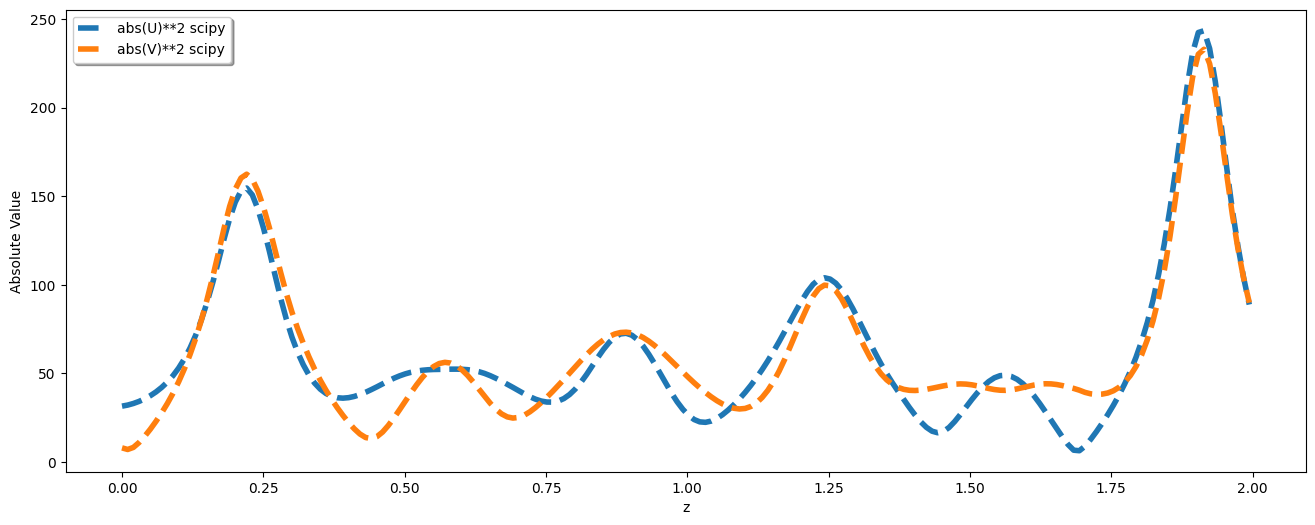

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

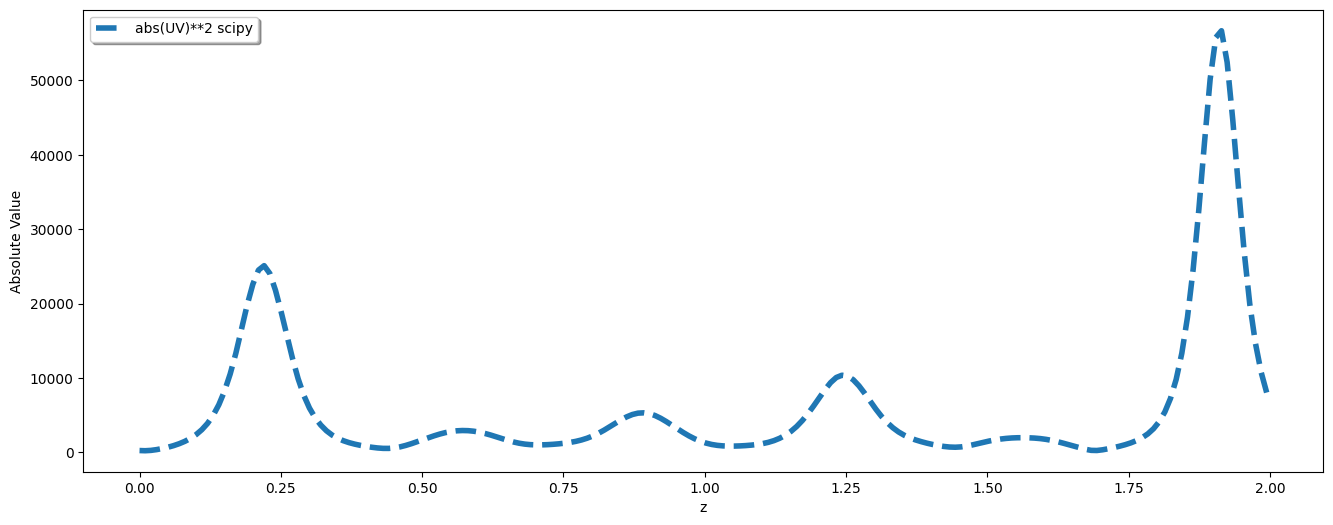

In [215]:
fig = plt.figure(figsize=(16, 6))
# plt.plot(z_eval, absolute(u_v_sol_mpmath.T)**2, linestyle="solid", linewidth=4) 
__y_vals__ = absolute(A_sol_scipy.T)**2
plt.plot(z_eval[0: len(__y_vals__)], __y_vals__, linestyle="dashed", linewidth=4) 
plt.legend(['abs(U)**2 scipy', 'abs(V)**2 scipy'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')
plt.show()

fig = plt.figure(figsize=(16, 6))
# plt.plot(z_eval, absolute(u_v_sol_mpmath.T)**2, linestyle="solid", linewidth=4) 
plt.plot(z_eval[0: len(__y_vals__)], abs(A_sol_scipy[0] * A_sol_scipy[1])**2, linestyle="dashed", linewidth=4) 
plt.legend(['abs(UV)**2 scipy'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')
plt.show()

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

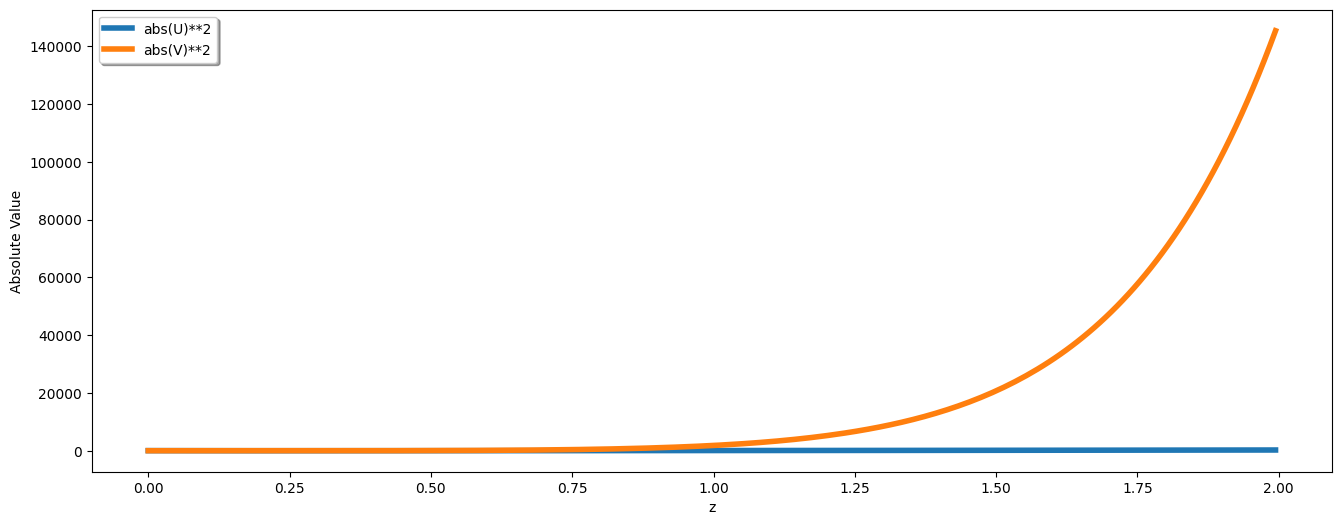

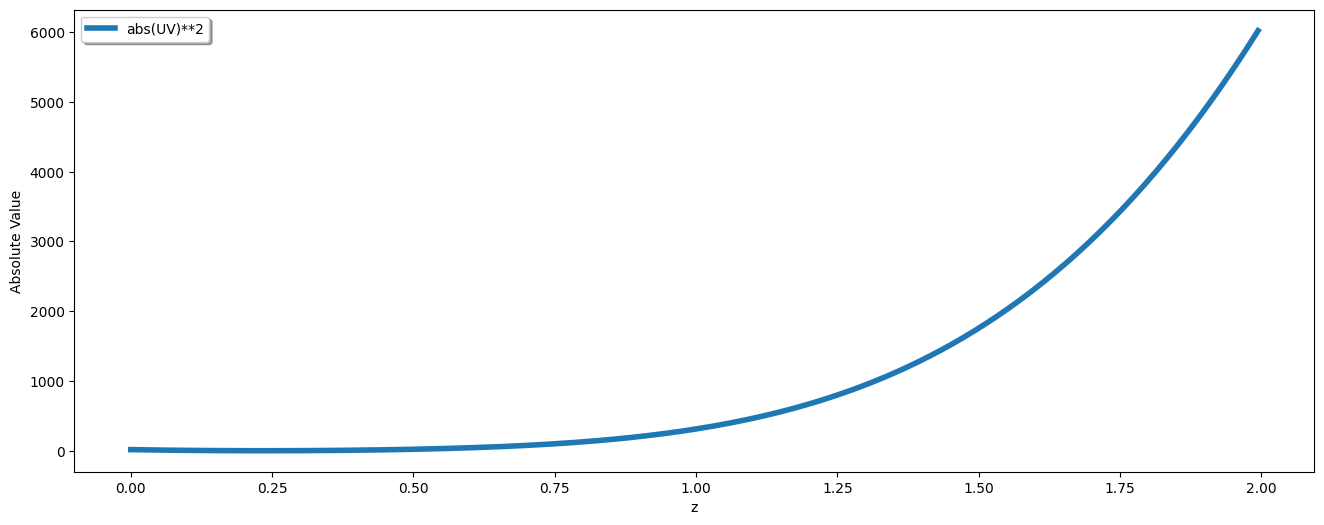

In [216]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, square(absolute(kron_sol_mpmath.T)), linestyle="solid", linewidth=4)  
plt.legend(['abs(U)**2', 'abs(V)**2'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')

fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, absolute(kron_sol_mpmath[0]*kron_sol_mpmath[1]), linestyle="solid", linewidth=4)  
plt.legend(['abs(UV)**2'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')

## System 2: Pseudo-Hyperelliptic Hamiltonian

In this section we do not renormalise the Hamiltonian to obtain elliptic function solutions as we did in System 1. Instead we use the following polynomial in $U,V$ as the Hamiltonian and we end up with a differential equation for $U(z)V(z)$ that, were it not for the repeated root, would suggest it is hyperelliptic (genus 2). Because of the repeated root I'm refering to this as pseudo-hyperelliptic for now. It may even be the case that because of the repeated root this differential equation is pseudo-elliptic. It may in fact be related to [Carlson's $R_J$ elliptic integral](https://dlmf.nist.gov/19.16) in a similar way that [$\wp$ is related to $R_F$](https://dlmf.nist.gov/19.25).

In [ ]:

UV_ham_XY_poly_b = Eq(-UV_ham_XY_poly.lhs - X**3/Y**2 + U(z)**5 + V(z)**5, 
                      -UV_ham_XY_poly.rhs - X**3/Y**2 + U(z)**5 + V(z)**5)
dUgen2 = Eq(diff(U(z),z), diff(UV_ham_XY_poly.rhs, V(z)))
dVgen2 = Eq(diff(V(z),z), -diff(UV_ham_XY_poly.rhs, U(z)))
dUVgen2 = Eq(Derivative(U(z)*V(z),z), diff(U(z)*V(z),z).doit().subs([dUgen2.args, dVgen2.args]).expand())
dUVgen2_sqrd = Eq(dUVgen2.lhs**2, dUVgen2.rhs**2 )
dUVgen2_sqrd_b = Eq(dUVgen2_sqrd.lhs, 
                    (dUVgen2_sqrd.rhs - (5*UV_ham_XY_poly_b.lhs)**2 + (5*UV_ham_XY_poly_b.rhs)**2)
                    .expand().collect(U(z)*V(z), factor)
                   )
dUVgen2_sqrd_c = Eq(dUVgen2_sqrd_b.lhs, 
                    (dUVgen2_sqrd_b.rhs.factor()/(-X**2 +Y**2*U(z)*V(z))**2)
                    .collect(U(z)*V(z), factor)
                    *(-X**2 +Y**2*U(z)*V(z))**2
                   )
dW_UV_XY_hyp = Eq(U(z)*V(z), W(z))
dW_sqrd_hyp = dUVgen2_sqrd_c.subs(U(z),solve(dW_UV_XY_hyp,U(z))[0]).doit()
dW_sqrd_hyp = Eq(dW_sqrd_hyp.lhs,
                 (dW_sqrd_hyp.rhs/(W(z)*Y**2-X**2)**2).expand().collect(W(z),factor) * (W(z)*Y**2-X**2)**2
                )

ln_dUgen2 = Eq(dUgen2.lhs/U(z), dUgen2.rhs/U(z)).expand().subs(*dW_UV_XY_hyp.args)

UV_ham_XY_poly_c = Eq((5*UV_ham_XY_poly_b.lhs/(U(z)*V(z))).expand(), 
                      (5*UV_ham_XY_poly_b.rhs/(U(z)*V(z))).subs(*dW_UV_XY_hyp.args).expand().collect(W(z), factor)
                     )

ln_dUVgen2 = Eq((dUVgen2.rhs/(U(z)*V(z))).expand(), (dUVgen2.lhs/(U(z)*V(z))).subs(*dW_UV_XY_hyp.args))

V4_U = Eq((UV_ham_XY_poly_c.lhs + ln_dUVgen2.lhs)/2, (UV_ham_XY_poly_c.rhs + ln_dUVgen2.rhs)/2)
ln_dUgen2_W = Eq(ln_dUgen2.lhs, ln_dUgen2.rhs.subs(*V4_U.args).expand().collect(W(z), factor))


UV_ham_XY_poly
UV_ham_XY_poly_b
dUgen2
dVgen2
dUVgen2
dUVgen2_sqrd
dUVgen2_sqrd_b
dUVgen2_sqrd_c
dW_UV_XY_hyp
dW_sqrd_hyp

# ln_dUgen2
# UV_ham_XY_poly_c
# ln_dUVgen2
# V4_U
ln_dUgen2_W

As well as observing the repeated root, it is noteworthy that that the other cubic part takes the identical form as the cubic in the Weierstrass P differential equation.

In [ ]:
dW_sqrd_hyp_b = Eq(Derivative(W(z), z)**2,
 (-X**2/Y**2 + W(z))**2*
   25*((25*X**2/Y**4 - 100*W(z)**3/Y**4 - 50*(X**2 + Y**3)*W(z)/Y**5 + 
    25*(X**4 + 6*X**2*Y**3 + Y**6)*W(z)**2/(X**2*Y**6))*(Y**4)/25).expand().collect(W(z)))

W_f_XY_sub = Eq(W(z), f(z) + X**2/(12*Y**2) + Y/2 + Y**4/(12*X**2))
dW_sqrd_hyp_c = dW_sqrd_hyp_b.subs(*W_f_XY_sub.args).doit()

dW_sqrd_hyp_c = Eq(Derivative(f(z), z)**2,
 (X**2 + (-2*X**2/Y - 2*Y**2)*(X**2/(12*Y**2) + Y/2 + f(z) + Y**4/(12*X**2)) + 
     (X**2/Y**2 + 6*Y + Y**4/X**2)*(X**2/(12*Y**2) + Y/2 + f(z) + Y**4/(12*X**2))**2 - 
     4*(X**2/(12*Y**2) + Y/2 + f(z) + Y**4/(12*X**2))**3).expand().collect(f(z))
                   *(-11*X**2/(12*Y**2) + Y/2 + f(z) + Y**4/(12*X**2)).expand()**2*25
                  )
f_g2_g3_subs = [(-g2XY.rhs, -g2XY.lhs), (-g3XY.rhs, -g3XY.lhs), pwx_2_4_XY_b.args]
df_hyp = dW_sqrd_hyp_c.subs(f_g2_g3_subs)
pwx = Eq(
    pw(2*omega1/5, g2, g3) - pwp(2*omega1/5, g2, g3)**2/(pw(2*omega1/5, g2, g3) - pw(4*omega1/5, g2, g3))**2, 
   pw(x,g2,g3)
)
df_hyp_b = df_hyp.subs(*pwx.args)

dW_sqrd_hyp_b
W_f_XY_sub
dW_sqrd_hyp_c
df_hyp
pwx
df_hyp_b

By setting $f$ to be a function of some other function that meets a certain criteria, then by the chain rule it can be shown that there is a connection between $f$ and the Weierstrass P function. The other function is the inverse of the Kronecker theta phase.

In [ ]:
fh_rho_sub = Eq(f(z),-h(rho(z)))

dh_rhoz = df_hyp.subs(*pwx.args).subs(*fh_rho_sub.args).doit()
d_rhoz_h = Eq(diff(rho(z),z), 5*(h(rho(z)) - pw(x,g2,g3)))
dh_rhoz_b = dh_rhoz.subs(*d_rhoz_h.args)
dh_rhoz_c = Eq(
    dh_rhoz_b.lhs/(dh_rhoz_b.lhs.subs(diff(h(rho(z)),rho(z)),1)), 
    dh_rhoz_b.rhs/(dh_rhoz_b.lhs.subs(diff(h(rho(z)),rho(z)),1))
).subs(rho(z), t).simplify()
h_pw = Eq(h(t), pw(t-t0,g2,g3))
fp_rho_sub = Eq(f(z),-pw(rho(z)-t0,g2,g3))

integral_rhoz_t = Eq(Integral(1/(pw(t-t0,g2,g3) - pw(x,g2,g3)),(t,rho(z),c)), z + C)
integral_rhoz_t_b = Eq(Integral(pwp(x,g2,g3)/(-pw(y,g2,g3) + pw(x,g2,g3)),(y,rho(z) - t0, c - t0)), 
                     -pwp(x,g2,g3)*z  - pwp(x,g2,g3)*C)
integral_rhoz_t_c = Eq(Integral(
    (pwp(x,g2,g3)/(-pw(y,g2,g3) + pw(x,g2,g3))).subs(*pwp_x_y_log_sigma_diff_c.args),(y,rho(z) - t0,c - t0)), 
                     -pwp(x,g2,g3)*z + -pwp(x,g2,g3)*C)
integral_rhoz_t_d = Eq(
    (log(sigma(x + y, g2, g3)*exp(-2*y*zw(x, g2, g3))/sigma(-x + y, g2, g3))).subs(y, -t0 + rho(z))
    -(log(sigma(x + y, g2, g3)*exp(-2*y*zw(x, g2, g3))/sigma(-x + y, g2, g3))).subs(y, -t0 + c),
    C*pwp(x, g2, g3) + z*pwp(x, g2, g3)
)
mu_const = Eq(mu,
    (log(sigma(x + y, g2, g3)*exp(-2*y*zw(x, g2, g3))/sigma(-x + y, g2, g3))).subs(y, -t0 + c) + C*pwp(x, g2, g3)
)
rho_r = Eq(rho(z), r(z) + t0)
integral_r = Eq(
    (log(sigma(x + y, g2, g3)*exp(-2*y*zw(x, g2, g3))/sigma(-x + y, g2, g3)))
    .subs(y, -t0 + rho(z)).subs(*rho_r.args),
    mu
    + z*pwp(x, g2, g3)
)

fr_sub = fp_rho_sub.subs(*rho_r.args)
integral_rhoz_t_d = integral_rhoz_t_d
d_rz_h = d_rhoz_h.subs(*h_pw.subs(t,rho(z)).args).subs(*rho_r.args).doit()

fh_rho_sub
dh_rhoz
d_rhoz_h
dh_rhoz_c
h_pw
fp_rho_sub

integral_rhoz_t
integral_rhoz_t_b
pwp_x_y_log_sigma_diff_c
integral_rhoz_t_c
integral_rhoz_t_d
rho_r
mu_const

fr_sub
integral_r
d_rz_h

In [ ]:
# https://dlmf.nist.gov/19.16
RJ = Function('RJ')
Rj_carlson = Eq(RJ(x,y,z,p), Rational(3,2)*Integral(1/(t+p)/sqrt((t+x)*(t+y)*(t+z)),(t,0,oo)))
Rj_carlson_b = Eq(RJ(x,y,z,p), Rational(3,2)*Integral(
    1/(t+p - epsilon)/sqrt((t+x - epsilon)*(t+y - epsilon)*(t+z - epsilon)),(t,epsilon,oo)))
Rj_carlson_c = (Rj_carlson_b
                .subs([(x,x+epsilon),(y,y+epsilon),(z,z+epsilon),(p,p+epsilon)])
                .subs([(x,mu[1]),(y,mu[2]),(z,mu[3])])
                .subs([(epsilon,r(z))])
               )
Rj_carlson_c_z = Eq(Rj_carlson_c.lhs, z + c)
Rj_carlson_d_z = Rj_carlson_c.subs(*Rj_carlson_c_z.args)
Rj_carlson_d_z_diff = Eq(diff(Rj_carlson_d_z.lhs,z), diff(Rj_carlson_d_z.rhs,z))
Rj_carlson_d_z_diff_b = Eq(diff(r(z),z)**2, 
                           solve(Eq(Rj_carlson_d_z_diff.lhs**2, Rj_carlson_d_z_diff.rhs**2),
                                 diff(r(z),z)**2)[0].factor()
                          )
rz_chi_sub = Eq(r(z),h(chi(z)))
chi_r = Rj_carlson_d_z_diff_b.subs(*rz_chi_sub.args).doit()
drz_chi_sub = Eq(diff(chi(z),z), (h(chi(z))+p)/3)
h_chi_z = Eq(h(t), pw(t,g2,g3))
mu_omega1 = Eq(mu[1], -pw(omega1,g2,g3))
mu_omega2 = Eq(mu[2], -pw(omega2,g2,g3))
mu_omega3 = Eq(mu[3], -pw(omega3,g2,g3))
p_pw_x = Eq(p, -pw(x,g2,g3))
zZ3 = Eq(z, Z*3)
dh_chi_sub_Z = Eq(Derivative(chi(Z*3),Z), (pw(chi(Z*3),g2,g3) - pw(x,g2,g3)))

carlson_chi_inv = Rj_carlson_c_z.subs([
    (r(z),pw(chi(z),g2,g3)), mu_omega1.args, mu_omega2.args, mu_omega3.args, p_pw_x.args])

dphi_Z5 = Eq(Derivative(phi(Z/5), z), -pw(x, g2, g3) + pw(phi(Z/5), g2, g3))

chi_phi = Eq(chi(3*Z), phi(Z/5)).subs(Z,z/3)

Rj_carlson
Rj_carlson_b
Rj_carlson_c
Rj_carlson_c_z
Rj_carlson_d_z
Rj_carlson_d_z_diff
Rj_carlson_d_z_diff_b
rz_chi_sub
chi_r
drz_chi_sub
h_chi_z
mu_omega1
mu_omega2
mu_omega3
p_pw_x
carlson_chi_inv

dh_chi_sub_Z
dphi_Z5
chi_phi

### Rescaling the second system

In [ ]:
delta_alpha_beta = Eq(5*beta/2/alpha, delta)
uv__delta_ham = Eq(uv_ham_beta_over_alpha.lhs - 5*beta/2/alpha, 
   (uv_ham_beta_over_alpha.rhs - 5*beta/2/alpha).subs(beta,solve(delta_alpha_beta,beta)[0]).collect(delta,factor)
  )
uv__delta_ham_b = Eq(uv__delta_ham.lhs - 3 + u(z)**5 + v(z)**5, uv__delta_ham.rhs - 3 + u(z)**5 + v(z)**5)

delta_alpha_beta
uv__delta_ham
uv__delta_ham_b

In [ ]:
du_delta = Eq(diff(u(z),z), diff(uv__delta_ham.rhs, v(z)))
dv_delta = Eq(diff(v(z),z), -diff(uv__delta_ham.rhs, u(z)))

du_delta
dv_delta

In [ ]:
(5*uv__delta_ham.lhs - 5*uv__delta_ham.rhs).expand()

In [ ]:
Eq(Derivative(ln(u(z)/v(z)),z,z), 
   diff(diff(ln(u(z)/v(z)),z).doit().subs([du_delta.args, dv_delta.args]).simplify(),z)
   .doit().subs([du_delta.args, dv_delta.args]).factor()
  )

In [ ]:
duv_delta = Eq(Derivative(u(z)*v(z),z), diff(u(z)*v(z),z).subs([du_delta.args, dv_delta.args]).simplify())
duv_delta_sqrd = Eq(duv_delta.lhs**2, 
                    (duv_delta.rhs**2).expand() -
                    ((5*uv__delta_ham_b.lhs)**2).expand() + (5*uv__delta_ham_b.rhs)**2
                   )


duv_delta
duv_delta_sqrd

In [ ]:
duv_delta_sqrd.subs(u(z),(W(z))/v(z)).rhs.expand().factor()

In [ ]:
dW_delta = duv_delta_sqrd.subs(u(z),(W(z))/v(z))
dW_delta

In [ ]:
v4_duv = Eq(0, 
   duv_delta.lhs/u(z)/v(z)/2 -
   ((duv_delta.rhs - 5* uv__delta_ham_b.lhs + 5*uv__delta_ham_b.rhs)/u(z)/v(z)/2)
   .expand().collect([delta,v(z)**4], factor)
  )
v4_duv

In [ ]:
Eq(du_delta.lhs/u(z) + v4_duv.lhs, 
   apart(
       ((du_delta.rhs/u(z)).expand().collect([v(z)**4,delta], factor) + v4_duv.rhs)
       .subs(v(z),W(z)/u(z)).subs(diff(W(z),z),Y),
       W(z)
  ).subs(Y,diff(W(z),z))
)

## On the connection between System 1 and System 2

The two different Hamiltonian systems can be related through a substitution that changes the argument of the function into a function of some other variable. In what folows, $U(z),V(z)$ are the modes in System 1 and are known to be Kronecker theta functions, and $u(z),v(z)$ are the unknown modes in System 2.

In [ ]:
du_pseudo_hyp = dUgen2.subs([(U(z),u(z)), (V(z),v(z))])
dv_pseudo_hyp = dVgen2.subs([(U(z),u(z)), (V(z),v(z))])

Uuq = Eq(U(z),u(q(z)))
Vvq = Eq(V(z),v(q(z)))
dq_uq_vq = Eq(diff(q(z),z), -Y**2/(-X**2+Y**2*u(q(z))*v(q(z)))/5)
dUu_qz = (dU_ellip_b
 .subs([Uuq.args, Vvq.args]).doit()
 .subs(*dq_uq_vq.args)
 .subs([(q(z),y)]).subs(y,z)
)
dUu_qz_numer, dUu_qz_denom = fraction(dUu_qz.lhs)
dUu_qz = Eq((-dUu_qz.lhs*dUu_qz_denom/Y**2).simplify(), 
            (-dUu_qz.rhs*dUu_qz_denom/Y**2).simplify().expand().collect([u(z),v(z)], factor))
dVv_qz= (dV_ellip_b
 .subs([Uuq.args, Vvq.args]).doit()
 .subs(*dq_uq_vq.args)
 .subs([(q(z),y)]).subs(y,z)
)
dVv_qz_numer, dVv_qz_denom = fraction(dVv_qz.lhs)
dVv_qz = Eq((-dVv_qz.lhs*dVv_qz_denom/Y**2).simplify(), 
            (-dVv_qz.rhs*dVv_qz_denom/Y**2).simplify().expand().collect([u(z),v(z)], factor))

Uuq
Vvq
dq_uq_vq

dUu_qz
dVv_qz

du_pseudo_hyp
du_pseudo_hyp
dU_ellip_b
dV_ellip_b

(dUu_qz.lhs - du_pseudo_hyp.lhs).simplify() == 0
(dUu_qz.rhs - du_pseudo_hyp.rhs).simplify() == 0
(dVv_qz.lhs - dv_pseudo_hyp.lhs).simplify() == 0
(dVv_qz.rhs - dv_pseudo_hyp.rhs).simplify() == 0

In [ ]:
dq_uq_vq_b = (dq_uq_vq
 .subs([(Uuq.rhs, Uuq.lhs), (Vvq.rhs, Vvq.lhs)])
 .subs(*W_UV_ellptic_b.args)
 .subs(*pw_y_XY.args).expand()
)
XY_pwx = pwx.subs([
    pw_y_XY.subs(*y_ham.args).args,
    pwp_y_XY_choice.subs(*y_ham.args).args,
    pw2y_XY.subs(*y_ham.args).args,
    pwp2y_XY.subs(*y_ham.args).args,
    pw4y_XY.subs(*y_ham.args).args,
    pwp4y_XY.subs(*y_ham.args).args,
])

dq__n_, dq__d_ = fraction(dq_uq_vq_b.rhs)
dq_uq_vq_c = Eq(dq_uq_vq_b.lhs, 1/(dq__d_/5/Y**2).expand().subs(*XY_pwx.args))
qz_sol = Eq(q(z), integrate(pwp_x_y_log_sigma_diff_c.subs(y,z).rhs,z).subs(z,z-z0) + C)

XY_pwx
dq_uq_vq_b
dq_uq_vq_c
pwp_x_y_log_sigma_diff_c.subs(y,z)
qz_sol